# Use Difference as additional input

This file is for using the difference as an input. However, we also take the input voltage into account. We therefore use input voltage and a delayed difference as input. The delay of the difference can be chosen.

We select a delay of 60 - meaning 1 minute. We figured that worst case, our model learns the the output purely based on the difference. With a smaller window of 60 seconds we would only overshoot our prediction for 1 minute. As always we need a trade off between the best possible outcome and uncertainty for the future.

## Preliminaries

### Import Libraries

In [1]:
# own libraries
import Global_Functions as gf
import Neuronal_Networks as nn

# python provided libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time
timestr = time.strftime("%Y-%m-%d_%H-%M_")

# ML Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
# set seed for reprocudible results
np.random.seed(123)

### Open files

In [3]:
OPEN_FOLDER = '../Data/Preped_Data/'

In [4]:
ex_1 = gf.open_CSV_file('experiment_1_short.csv', OPEN_FOLDER)
ex_4 = gf.open_CSV_file('experiment_4_short.csv', OPEN_FOLDER)
ex_9 = gf.open_CSV_file('experiment_9_short.csv', OPEN_FOLDER)
ex_20 = gf.open_CSV_file('experiment_20_short.csv', OPEN_FOLDER)
ex_21 = gf.open_CSV_file('experiment_21_short.csv', OPEN_FOLDER)
ex_22 = gf.open_CSV_file('experiment_22_short.csv', OPEN_FOLDER)
ex_23 = gf.open_CSV_file('experiment_23_short.csv', OPEN_FOLDER)
ex_24 = gf.open_CSV_file('experiment_24_short.csv', OPEN_FOLDER)

In [5]:
experiments = [ex_1, ex_4, ex_9, ex_20, ex_21, ex_22, ex_23, ex_24]
names = ['1', '4', '9', '20', '21','22', '23', '24']

In [6]:
OPEN_SYNTHETIC = 'C:/Users/FlorianLeiser/Documents/Masterarbeit/Data/Synthetic_Data/Without_Noise/Sample_Ratio_1/quadratic_12_34_linear_1'

In [7]:
experiments = gf.load_synthetic(OPEN_SYNTHETIC, length = 50)
names = [str(x+1) for x in range(len(experiments)-1)]
names.append("hand")

### Specify parameters

In [8]:
NEUR = 128
EPOCH = 2
LAG = 30
DIFFERENCE = 'add'
BATCH_SIZE = 512

In [9]:
train = "20"
val = "21"

train_exs = experiments[:15]
ex_train = gf.use_multiple_experiments(train_exs)
ex_val = gf.use_multiple_experiments(experiments[15:18])
ex_test = gf.use_multiple_experiments(experiments[18:20])

In [10]:
# saving folder for images
image_path = "../Images/Syntheitc/1/Difference/" + str(DIFFERENCE) + "/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}/" 
image_folder = image_path + specs.format(train, val, NEUR, EPOCH, LAG)

gf.check_folder(image_folder)

Creation of directory ../Images/Syntheitc/1/Difference/add/2021-05-18_16-47_training_20 val_21 128_neurons__2_epochs__lag_30/ successful.


In [11]:
# saving folder for images
model_path = "../Models/Synthetic/1/Difference/" + str(DIFFERENCE) + "/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}/" 
model_folder = model_path + specs.format(train, val, NEUR, EPOCH, LAG)

gf.check_folder(model_folder)

Creation of directory ../Models/Synthetic/1/Difference/add/2021-05-18_16-47_training_20 val_21 128_neurons__2_epochs__lag_30/ successful.


## Training the model

In [12]:
model, history, scaler_train, X_train, y_train, _, X_val, y_val = nn.train_model(ex_train, ex_val,
                                                   difference_chosen = DIFFERENCE, lag_chosen = LAG,
                                                   save_folder = model_folder,
                                                   nmb_epochs = EPOCH, neurons_chosen = NEUR)

Folder already exists.


C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs
C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


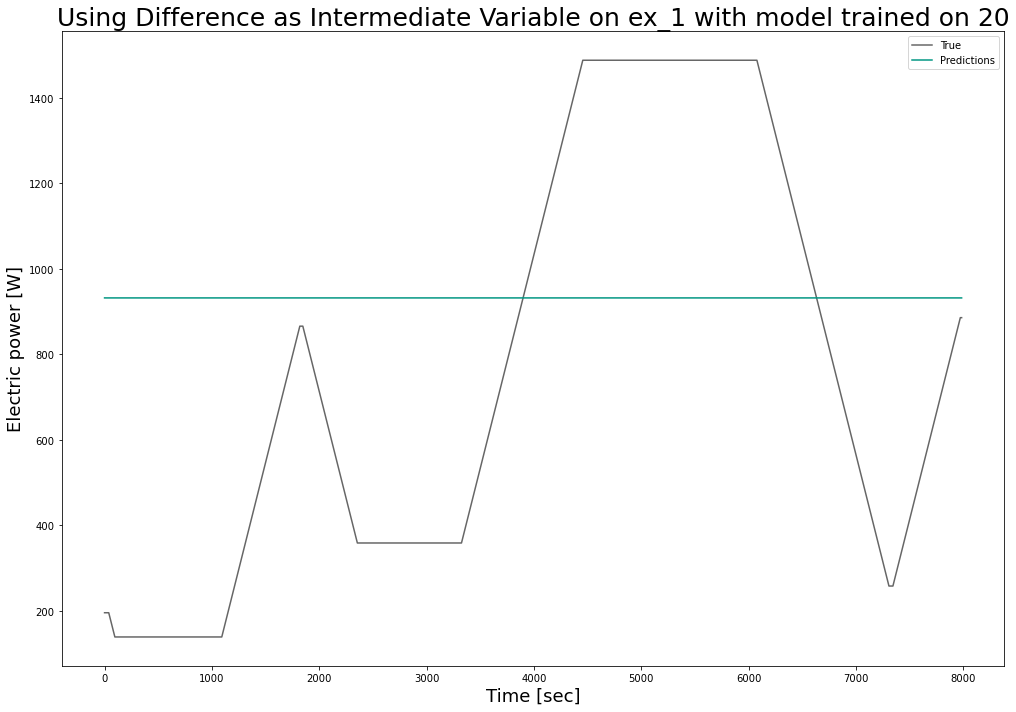

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


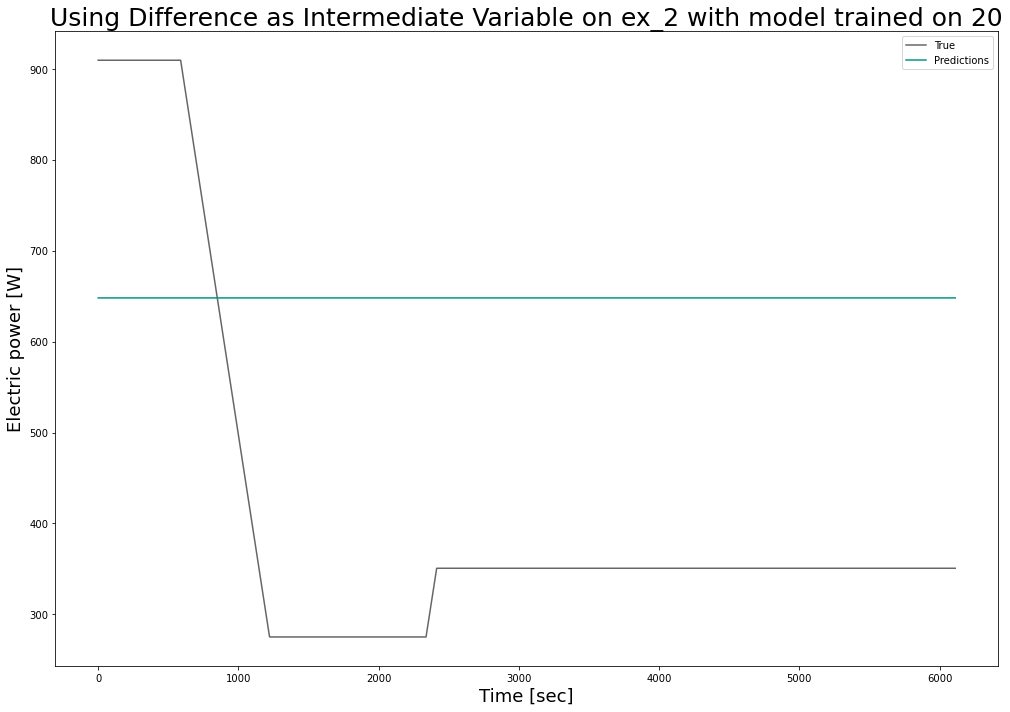

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


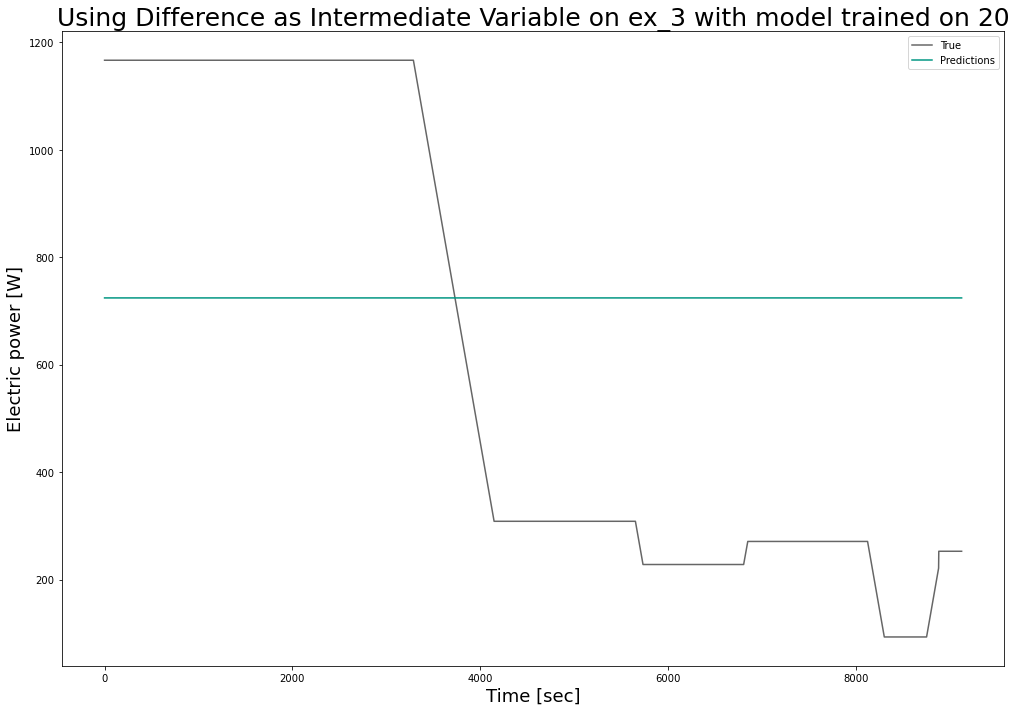

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


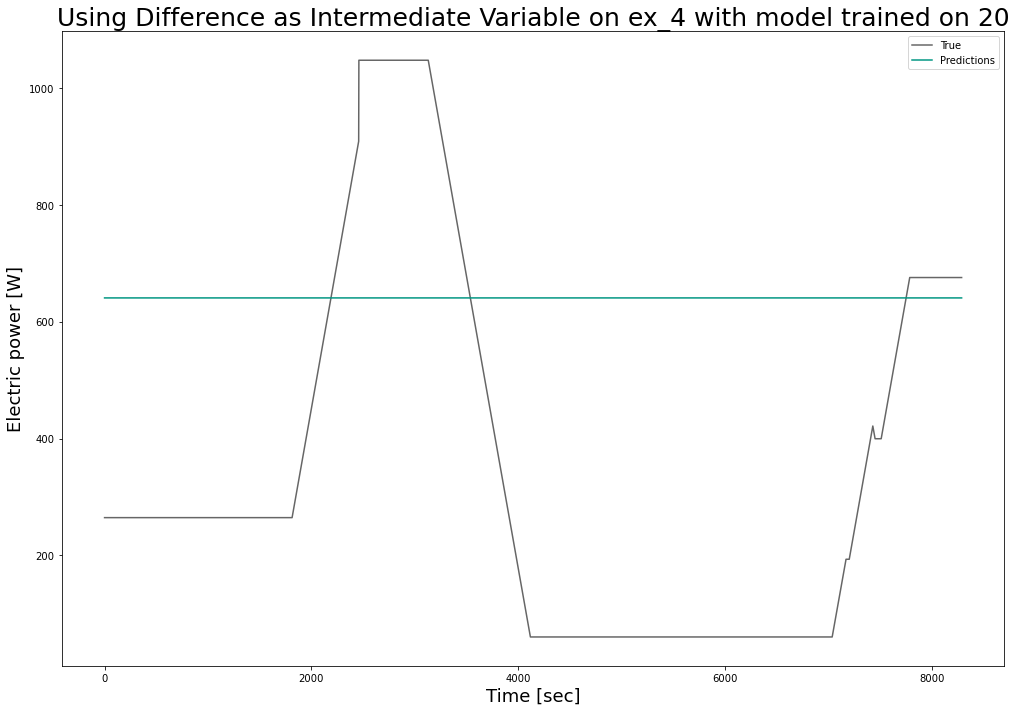

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


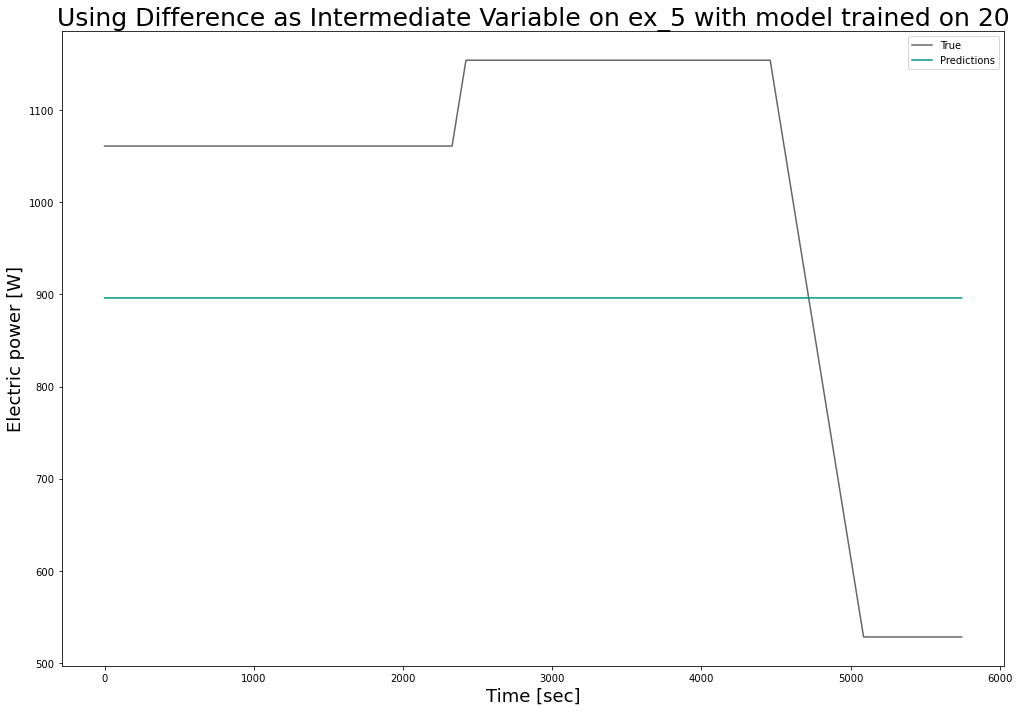

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


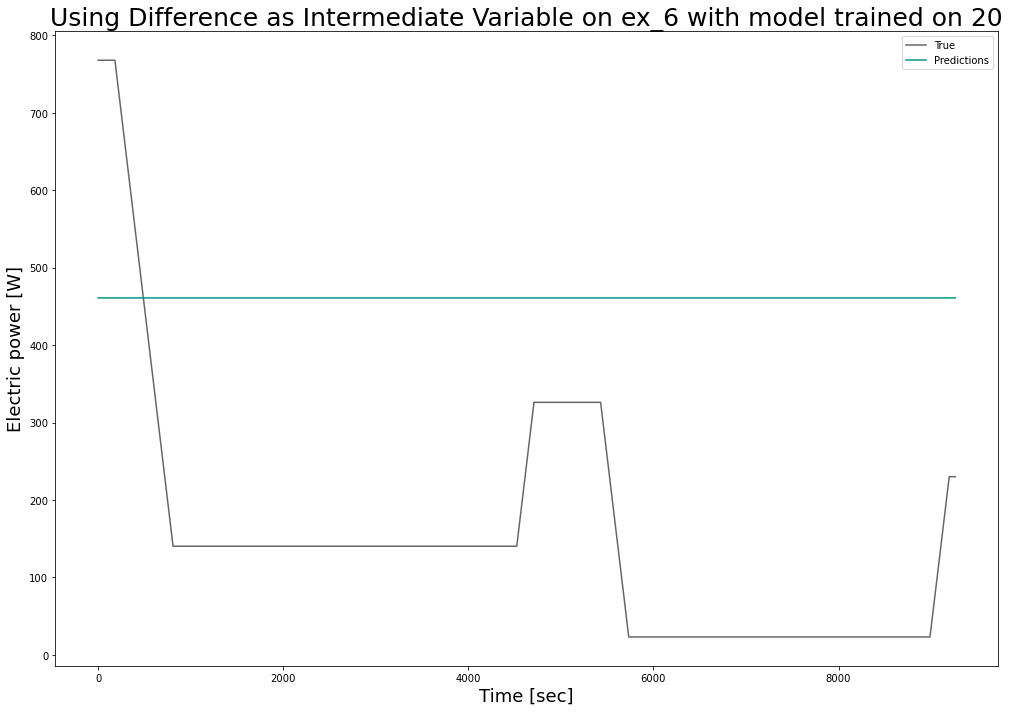

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


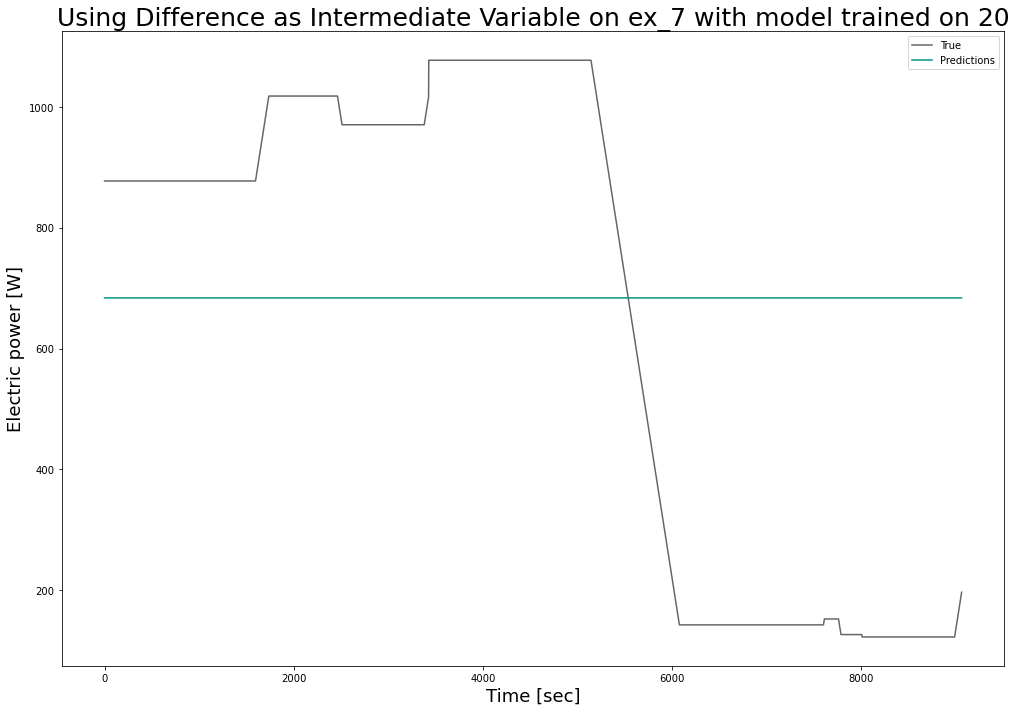

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


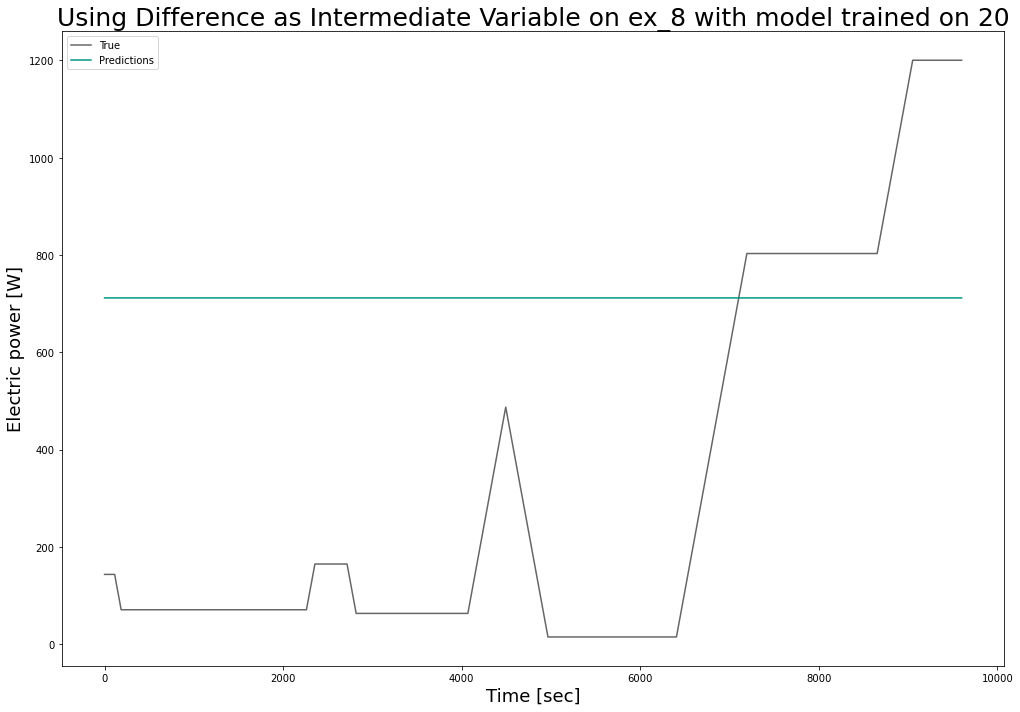

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


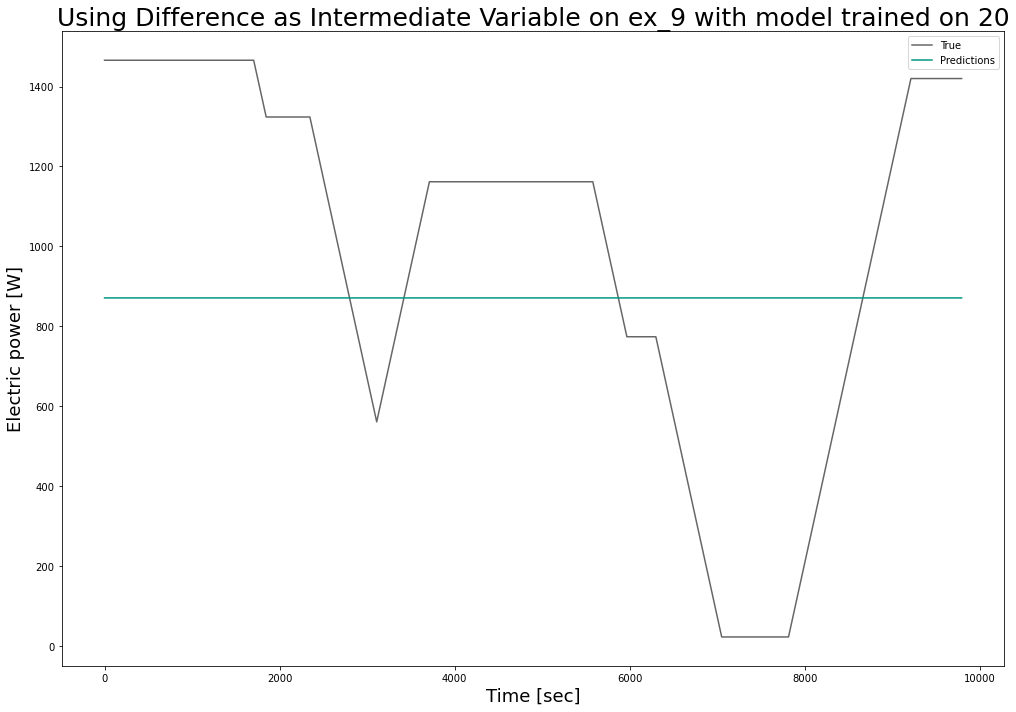

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


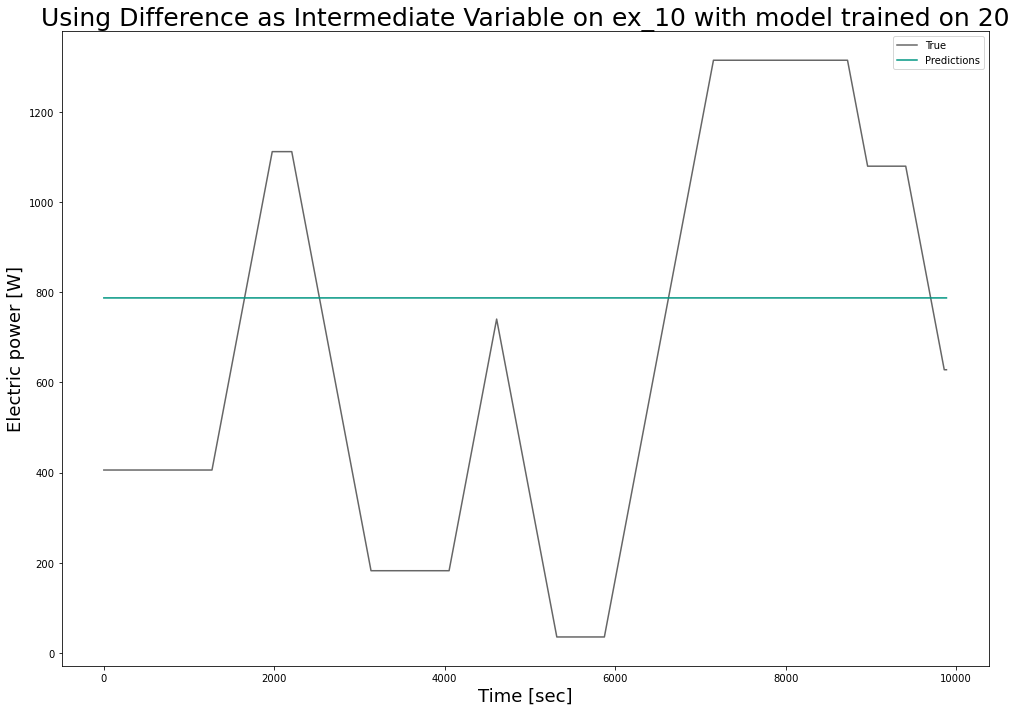

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


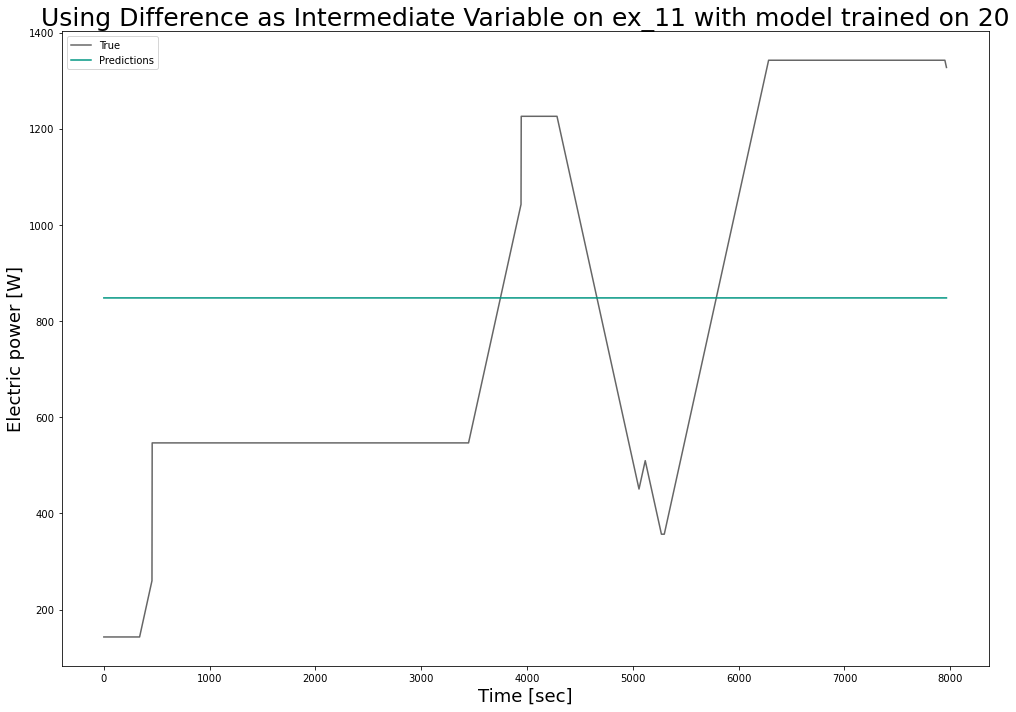

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


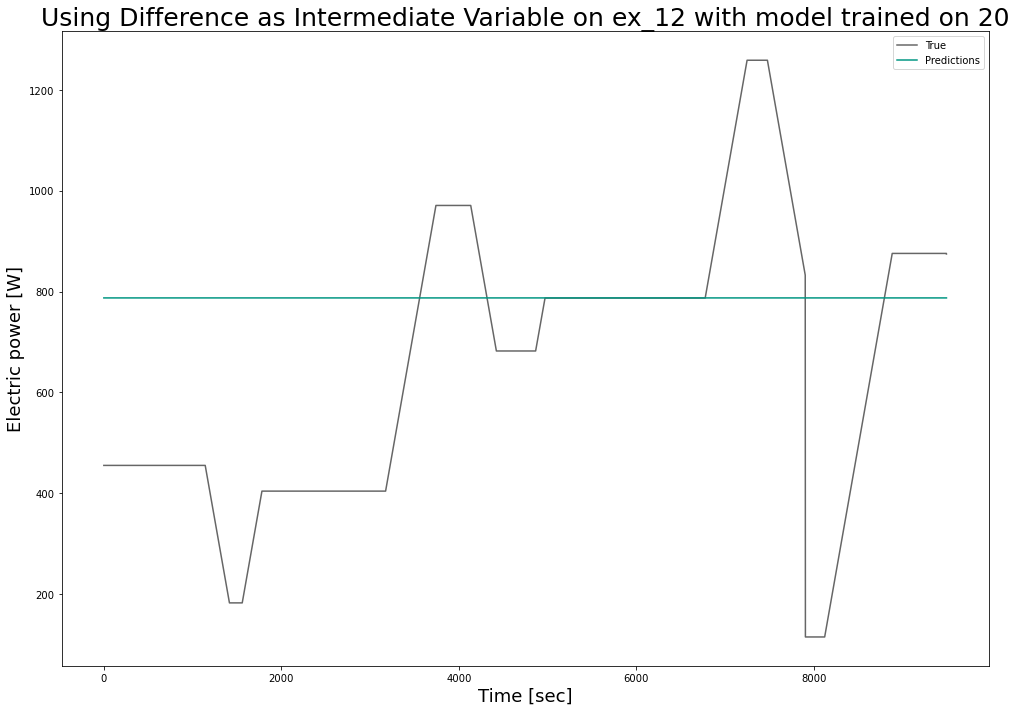

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


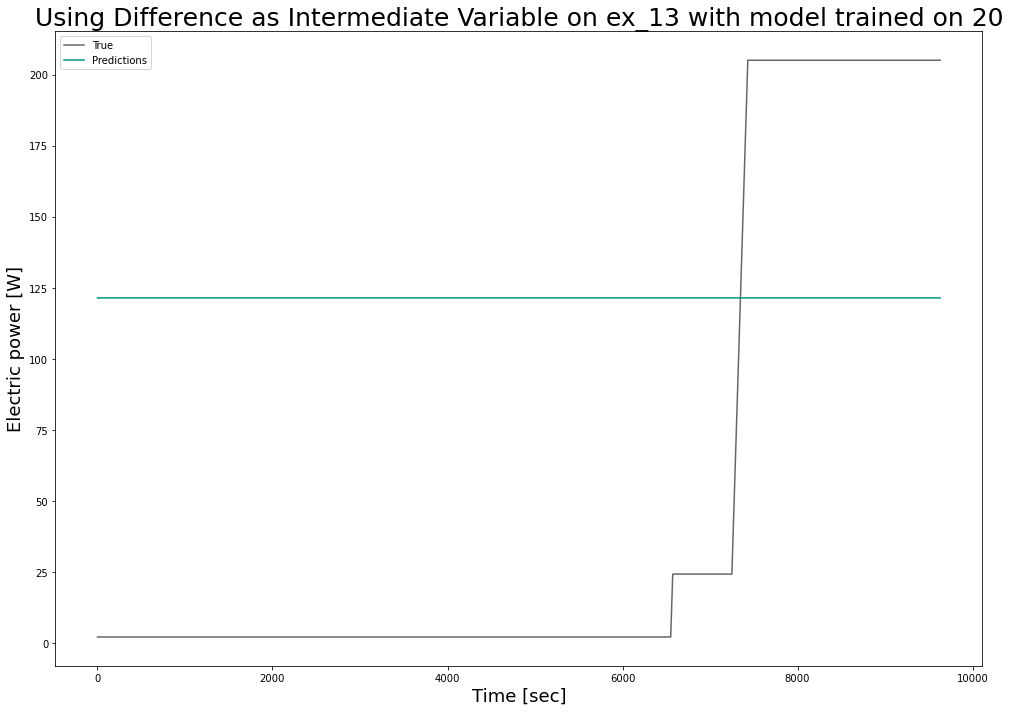

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


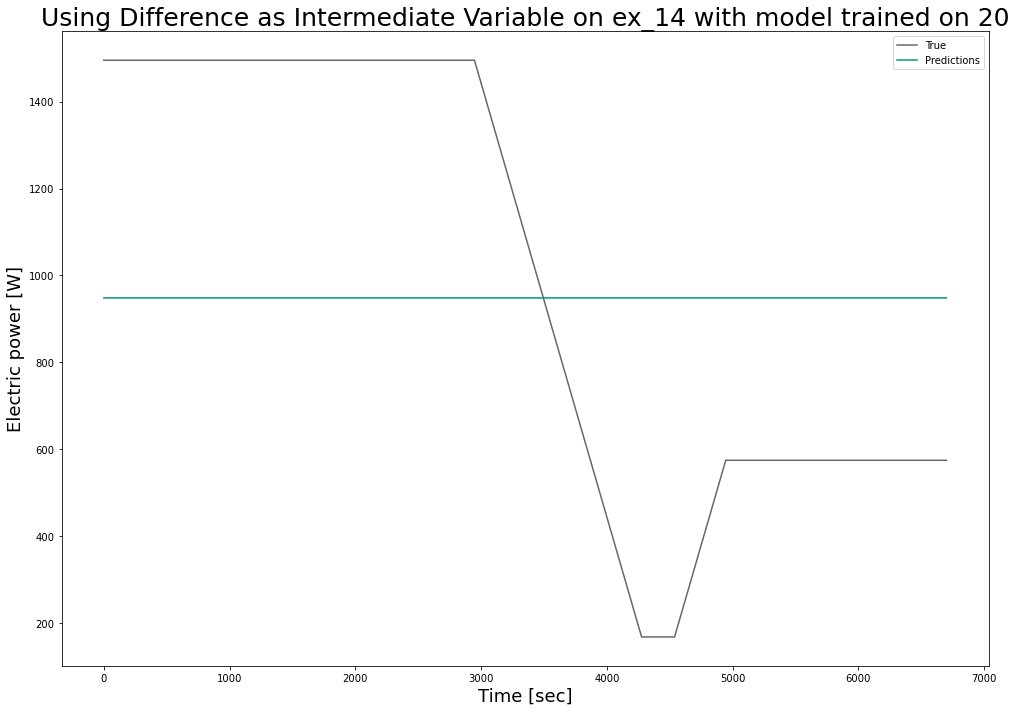

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


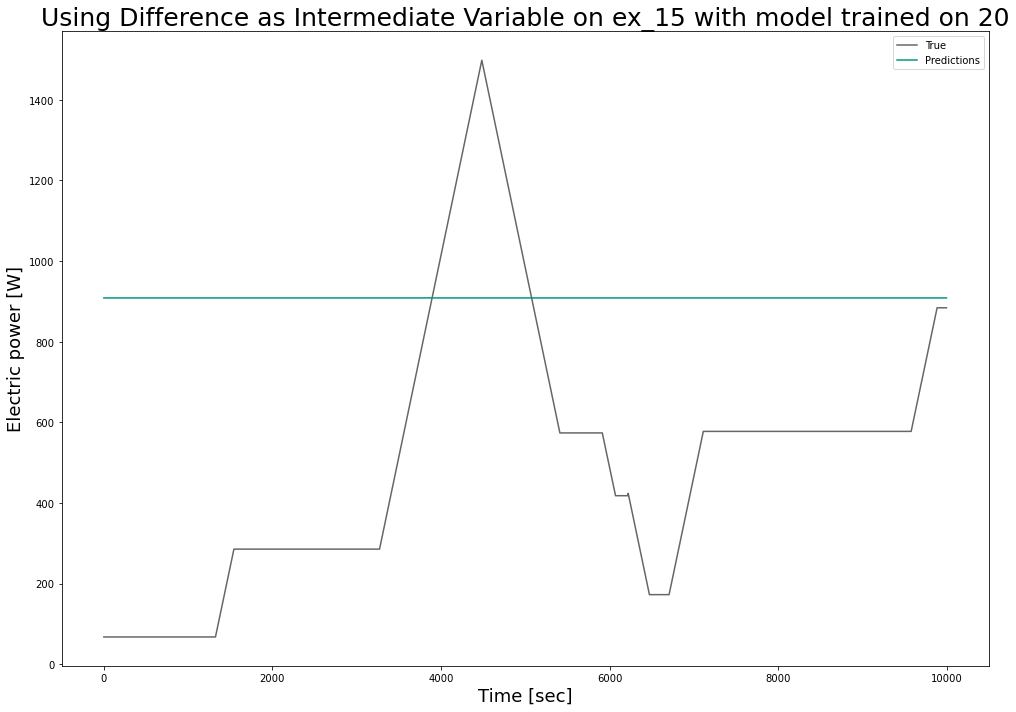

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


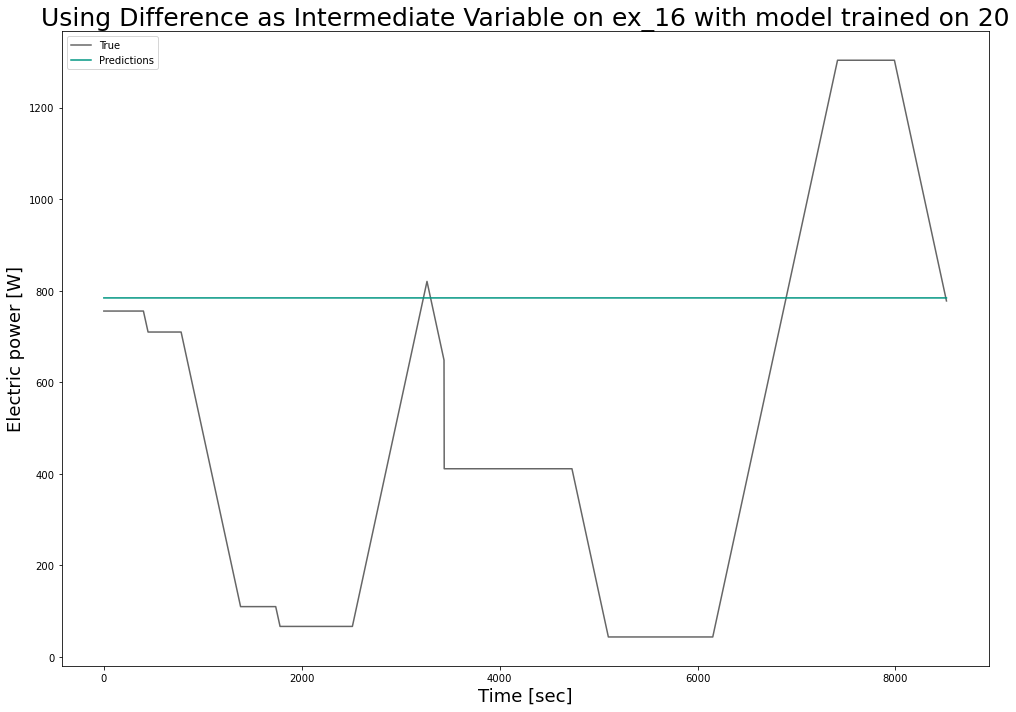

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


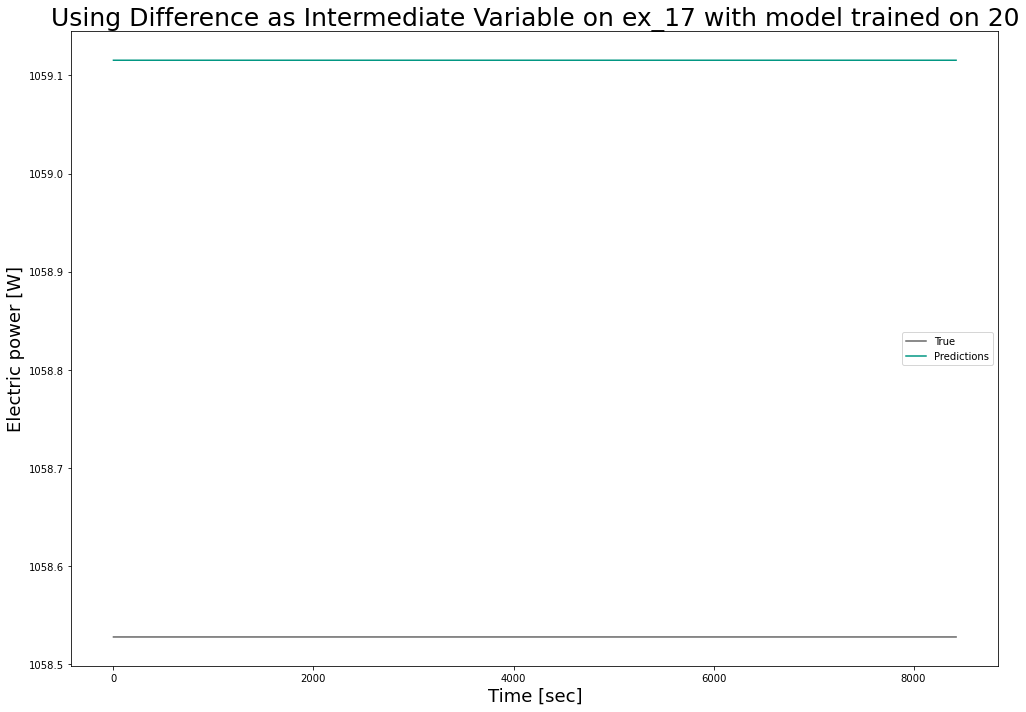

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


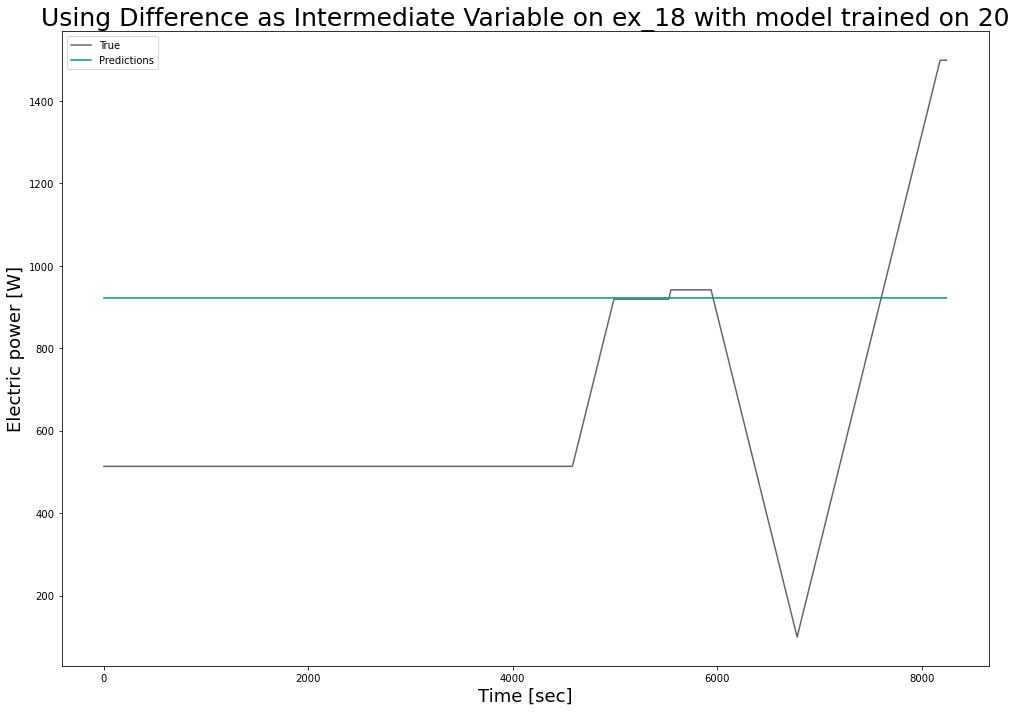

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


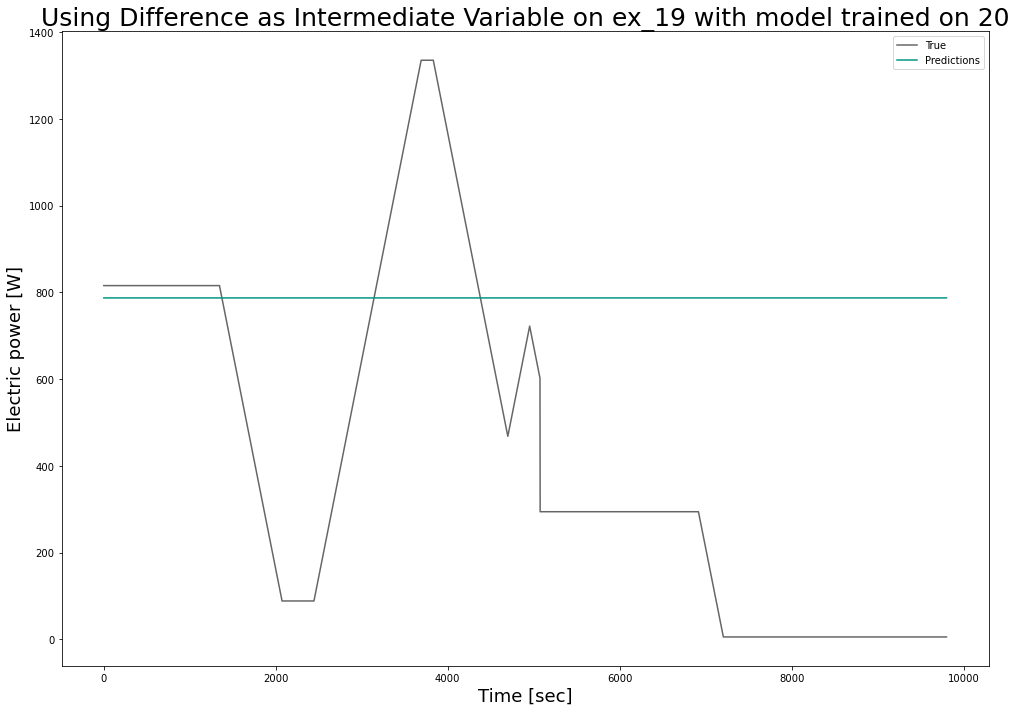

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


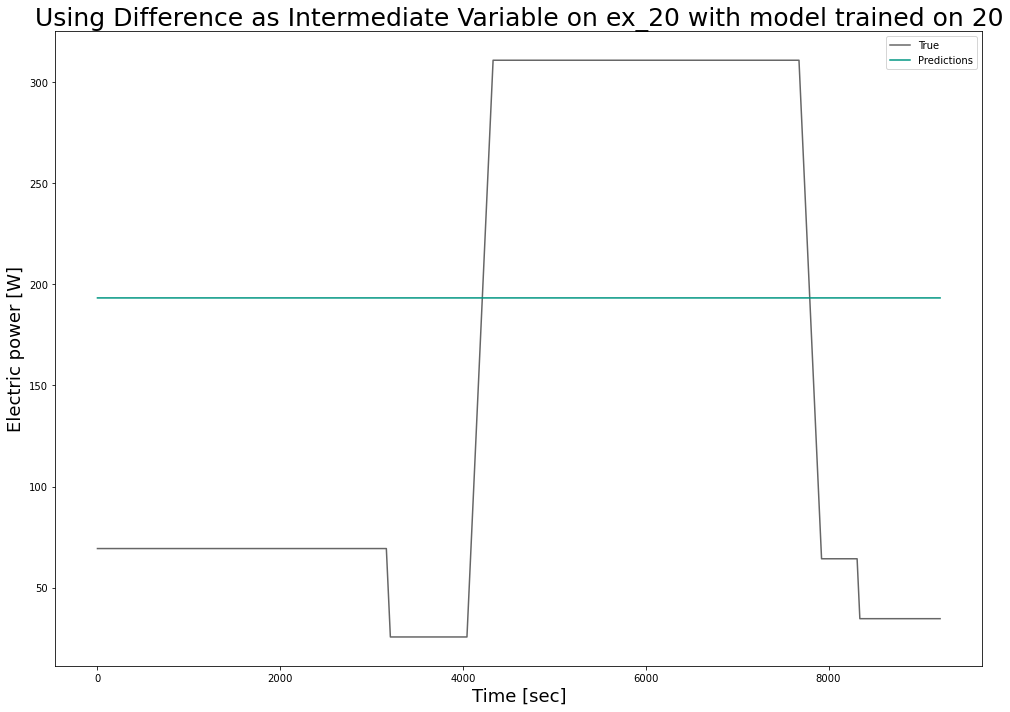

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


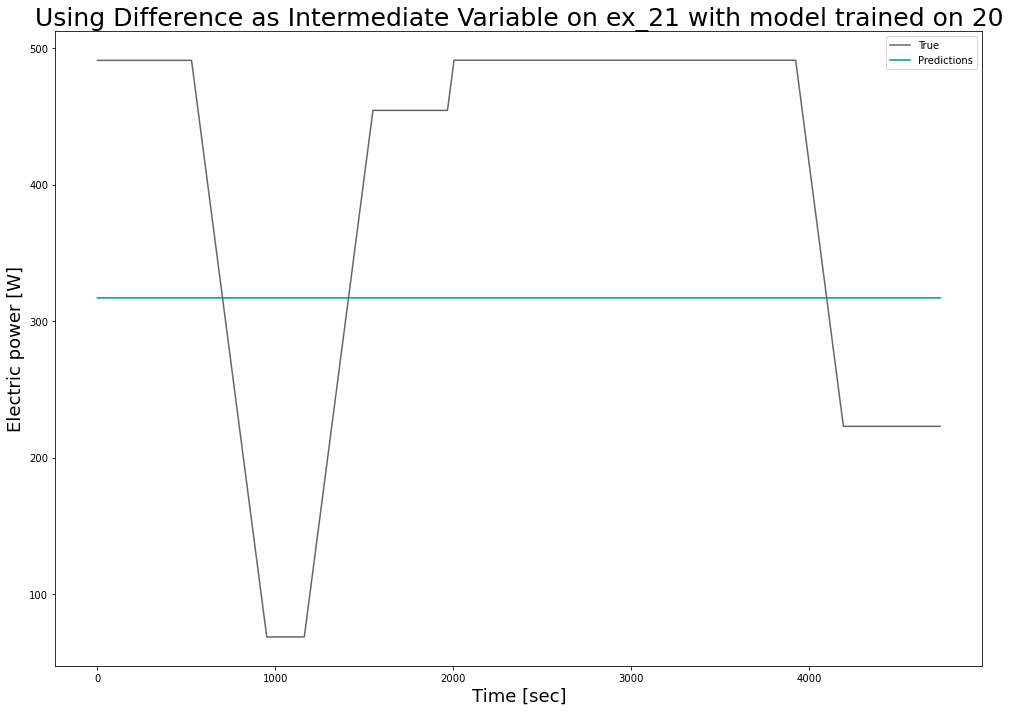

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


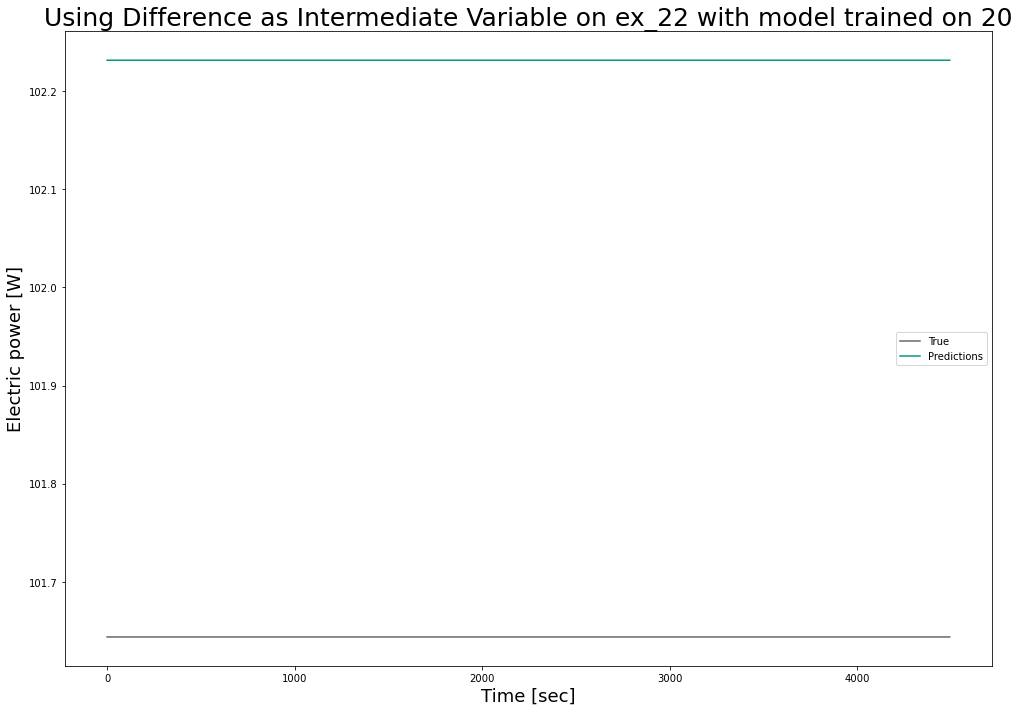

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


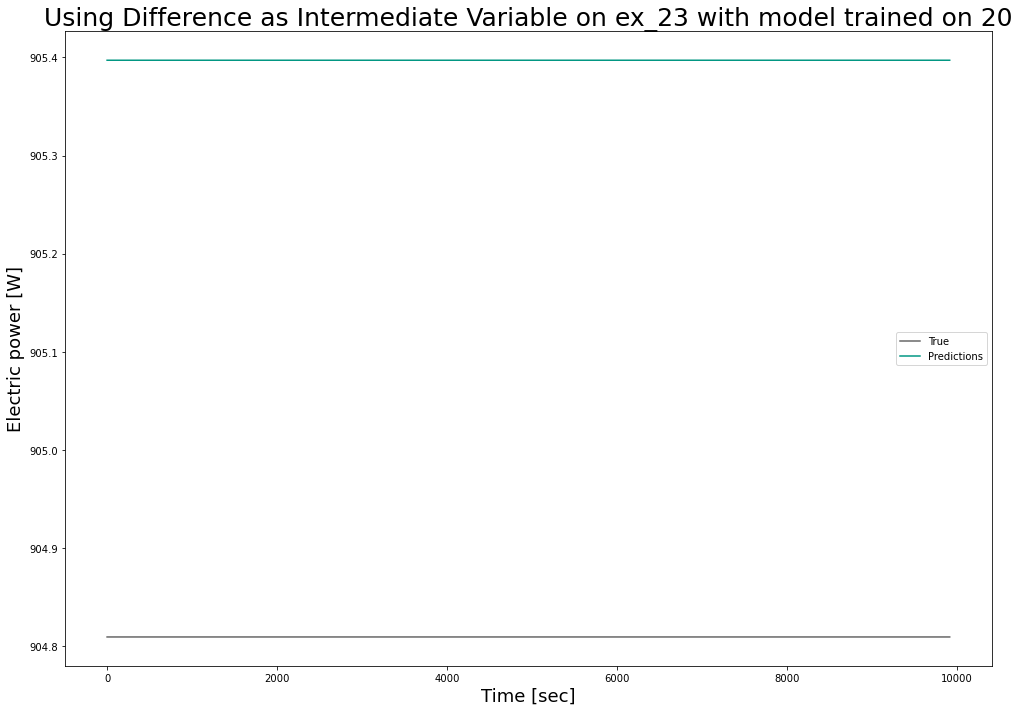

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


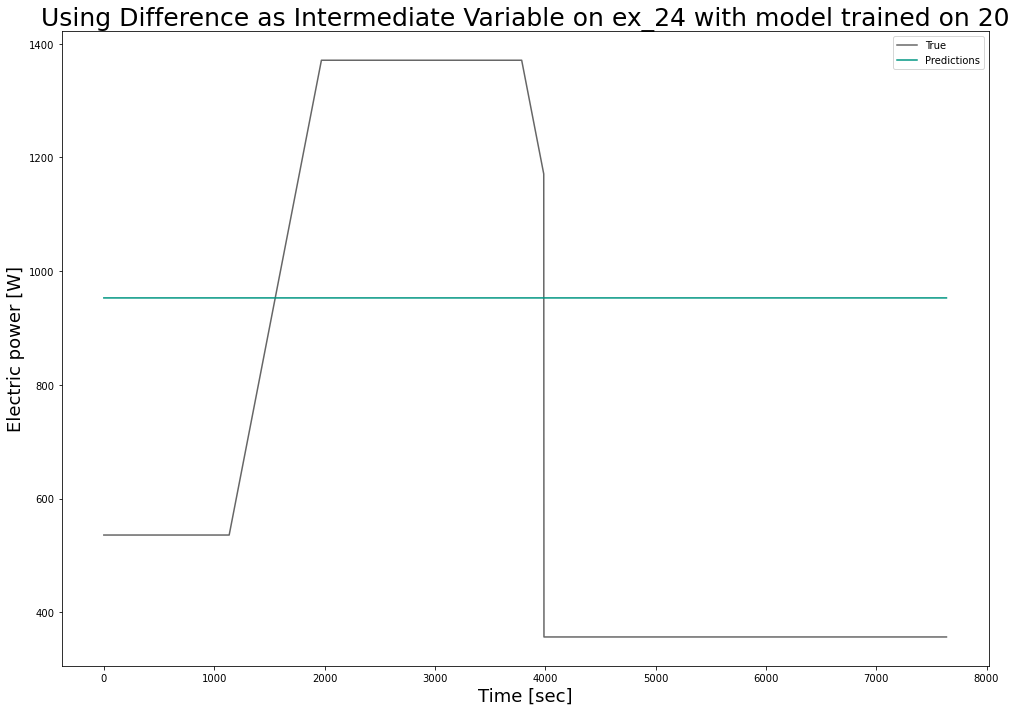

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


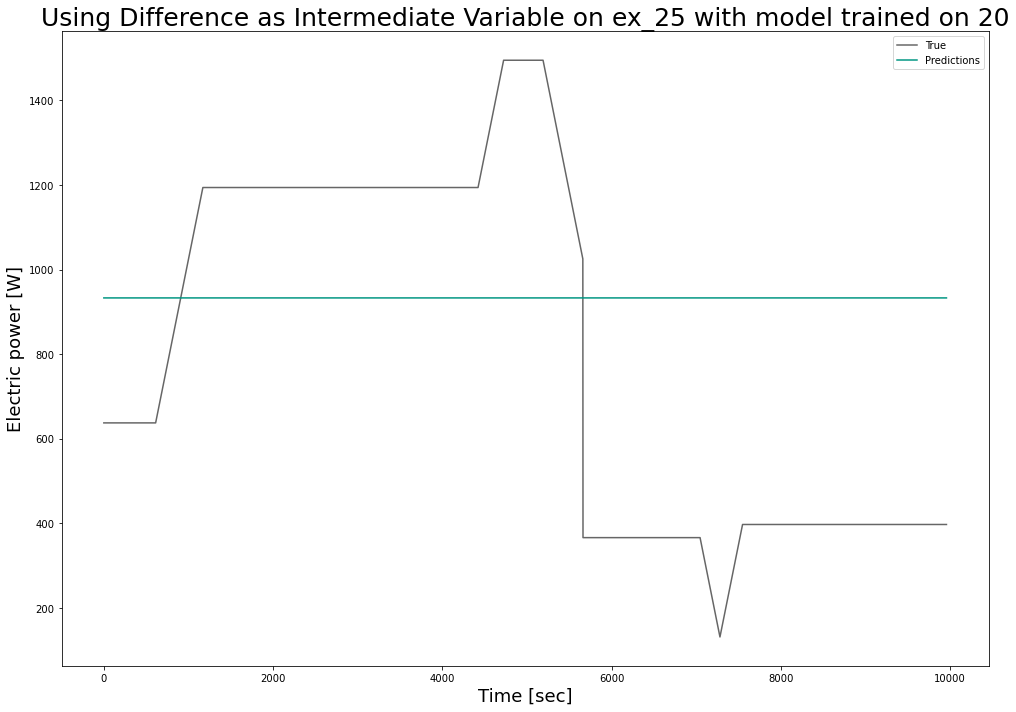

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


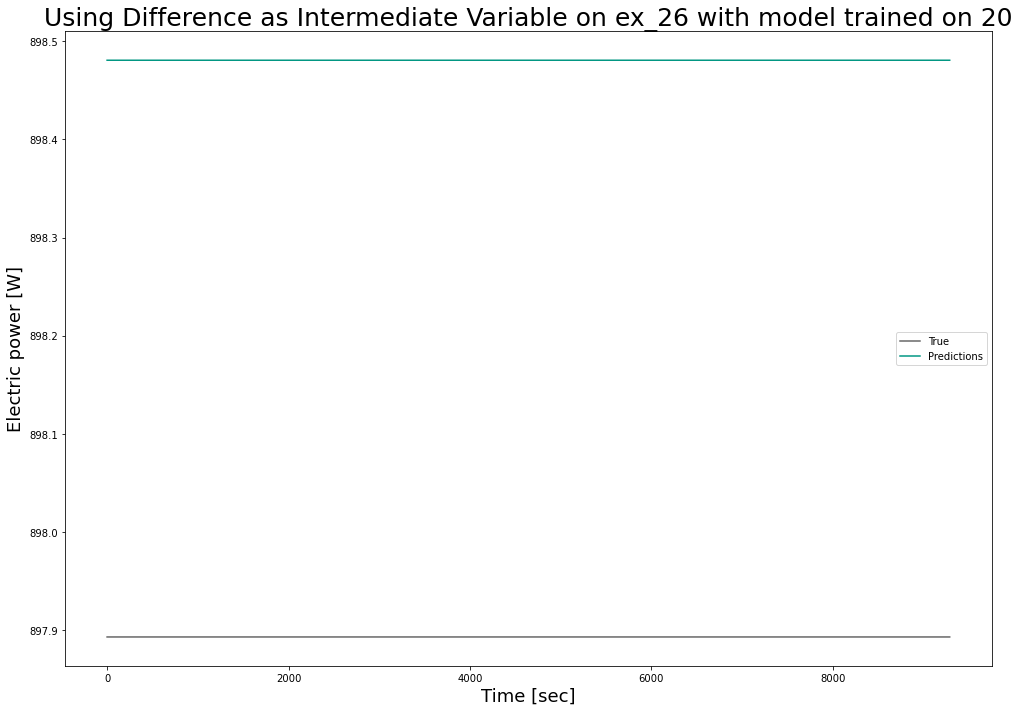

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


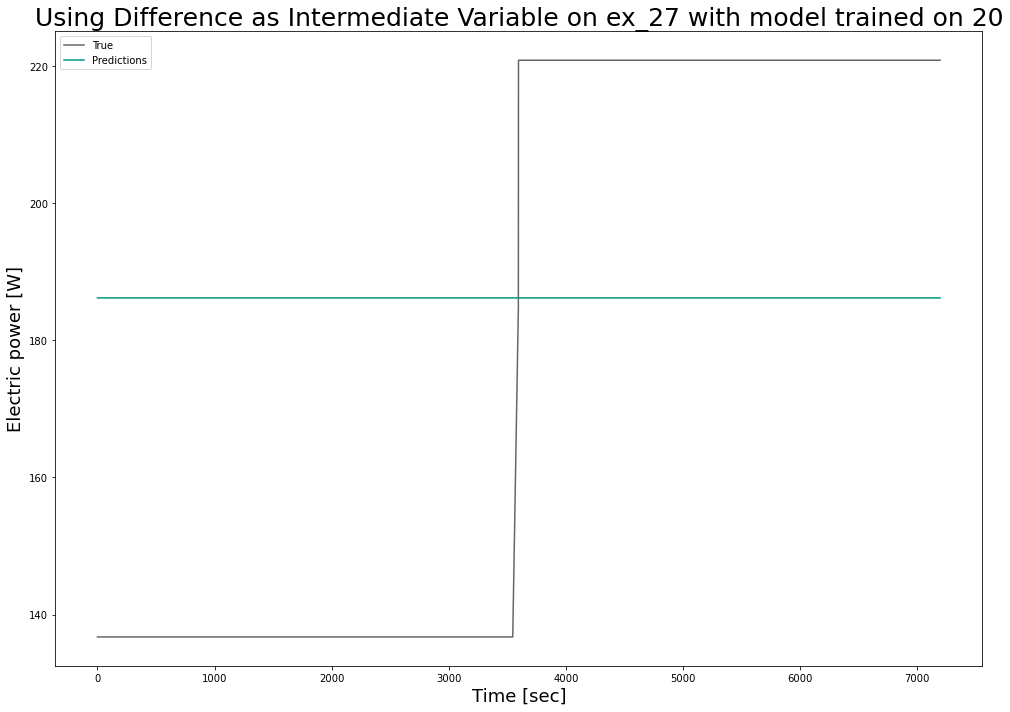

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


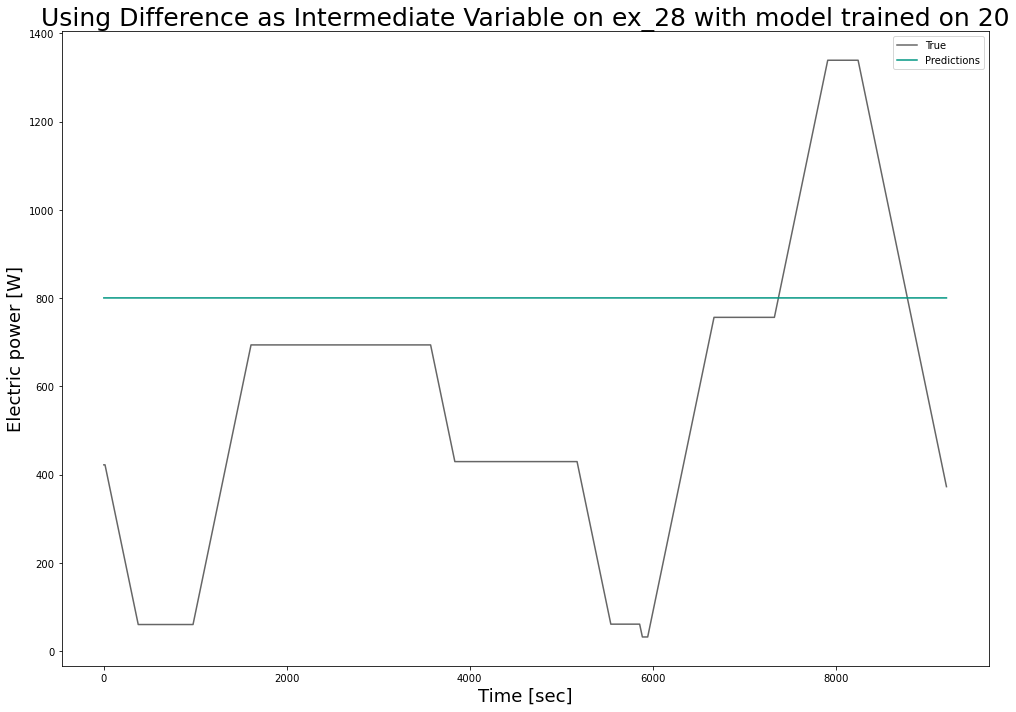

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


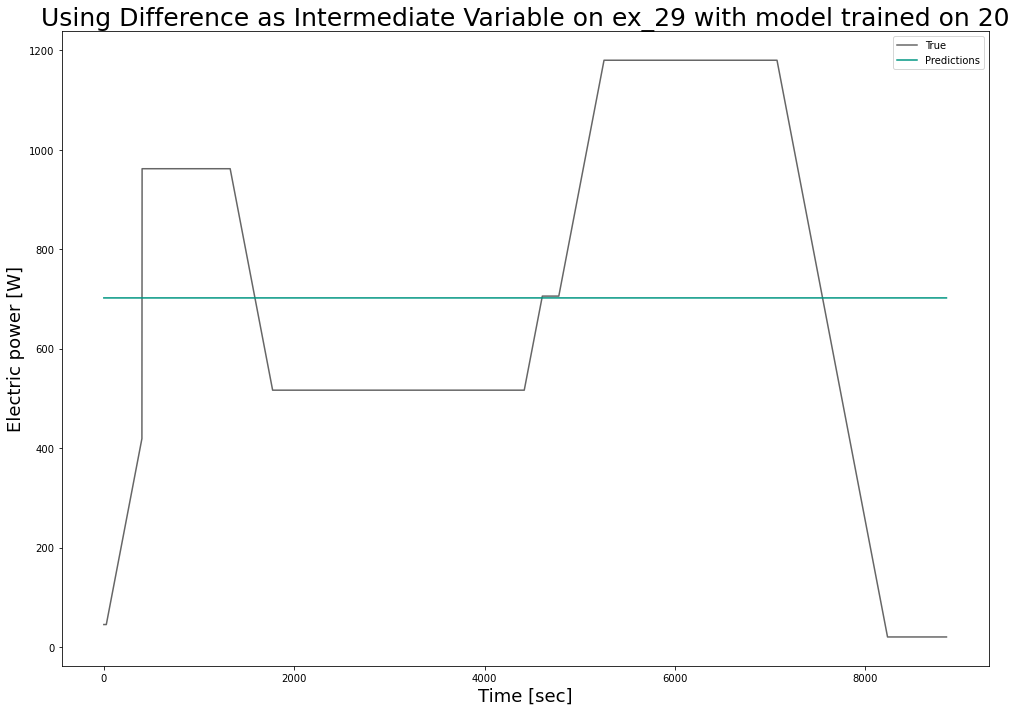

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


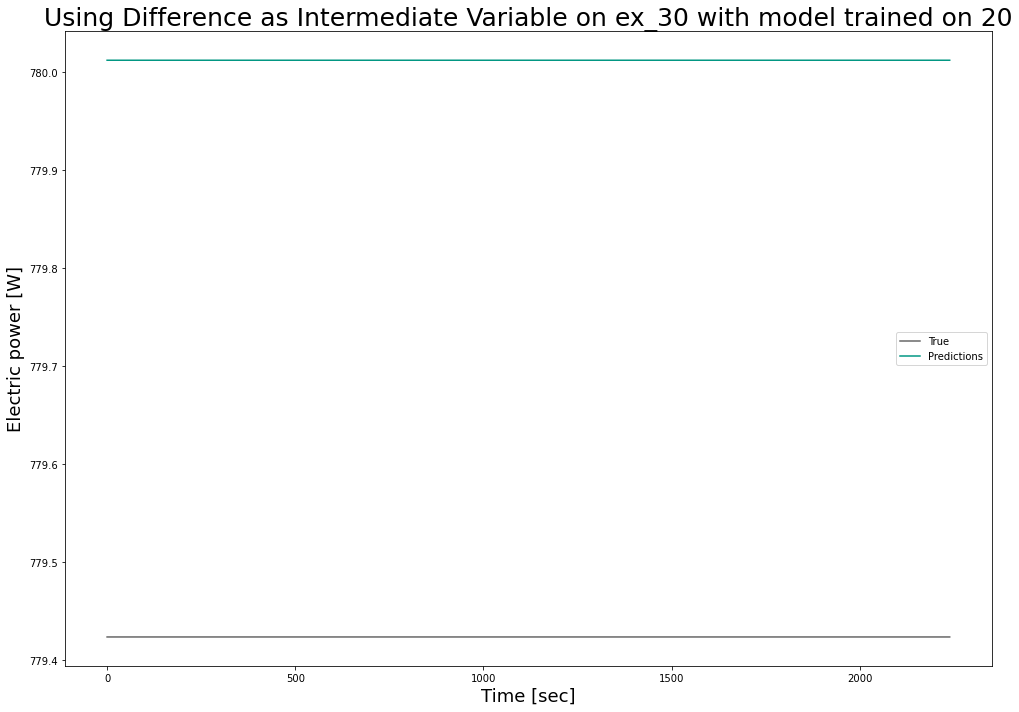

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


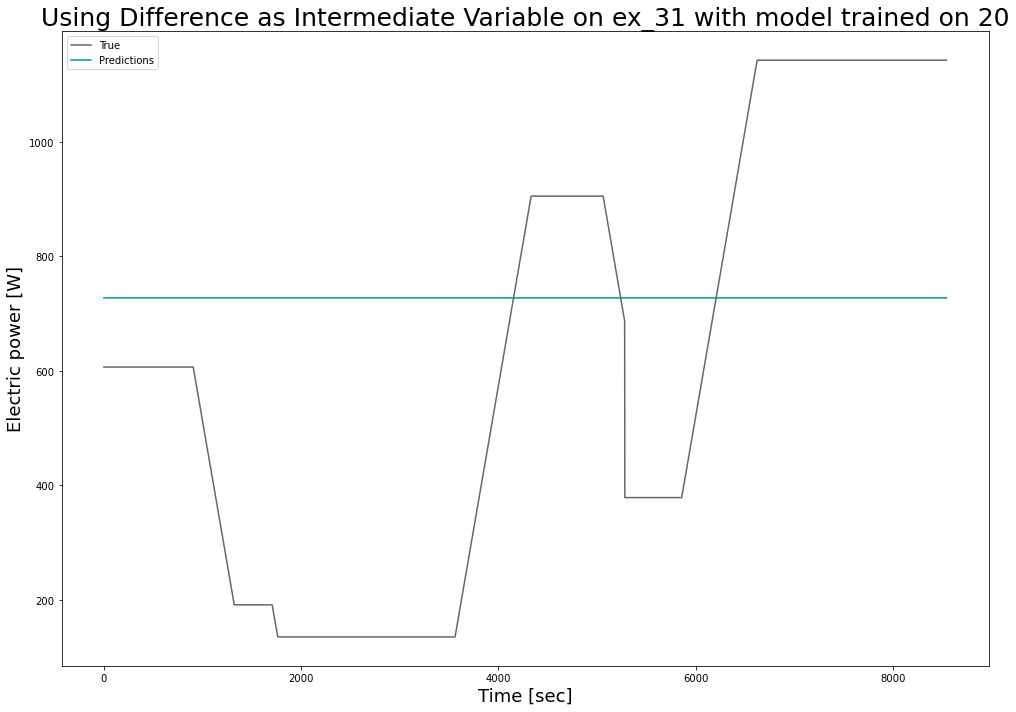

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


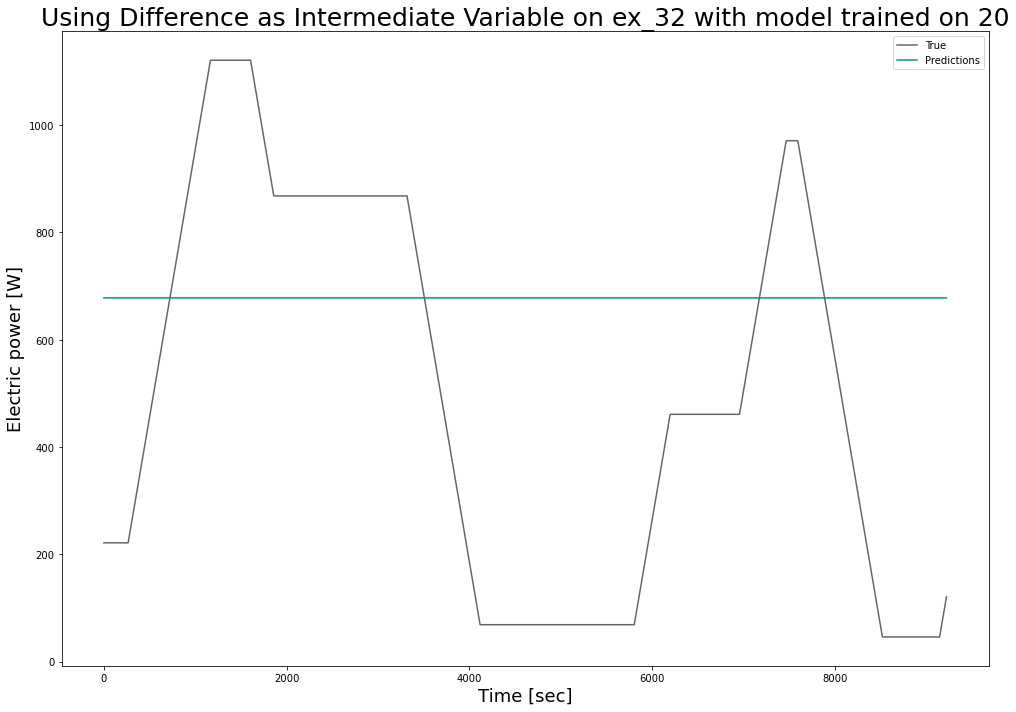

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


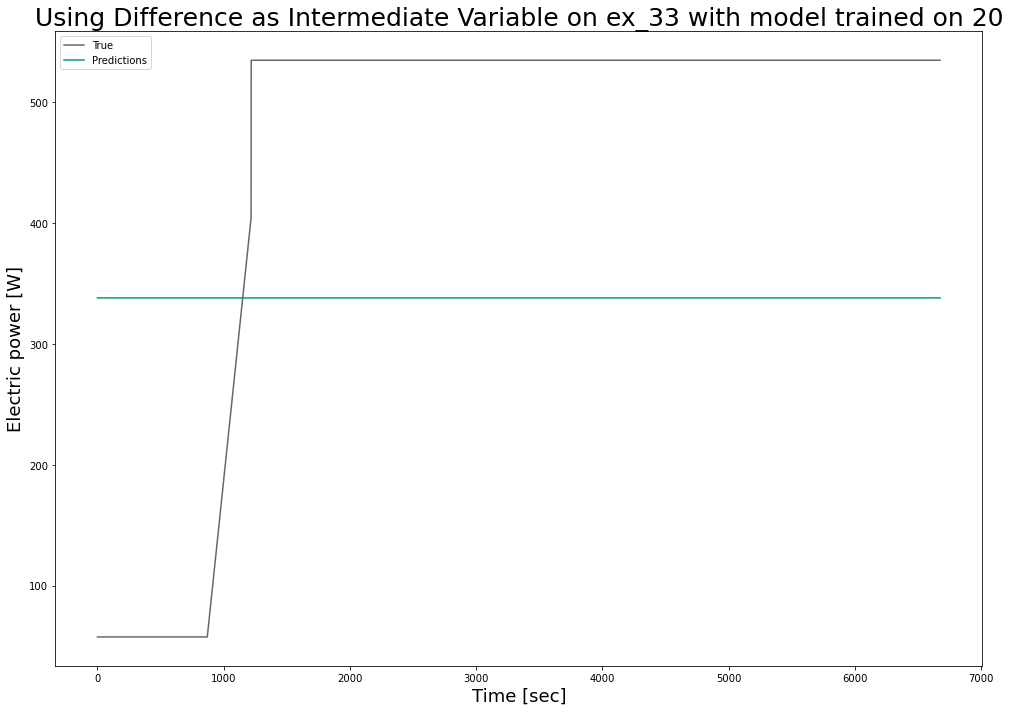

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


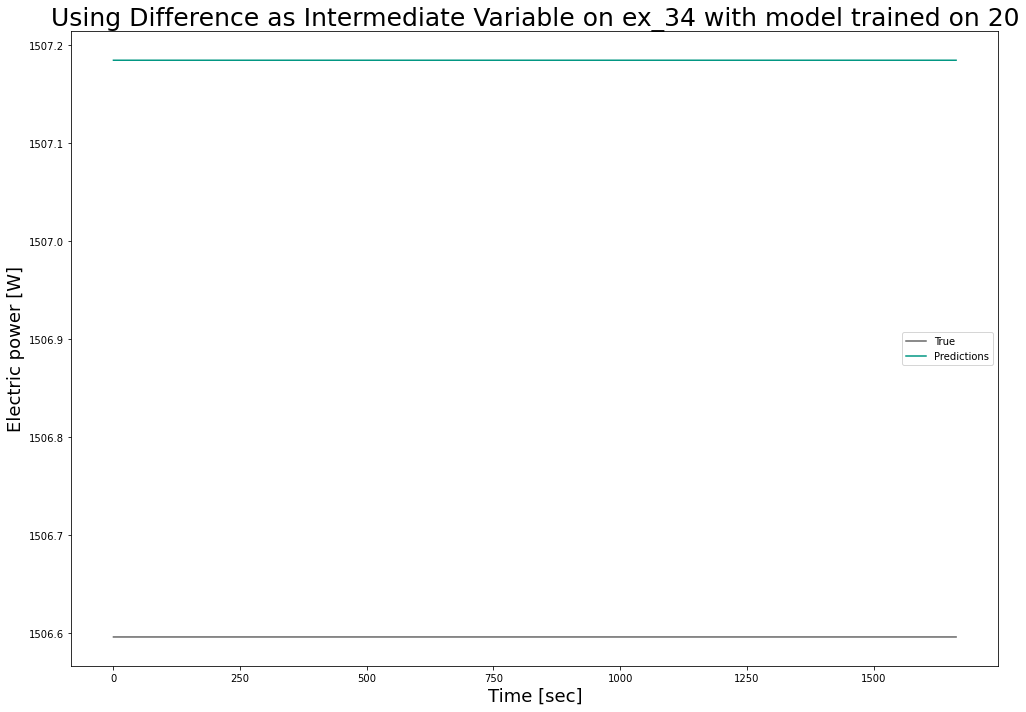

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


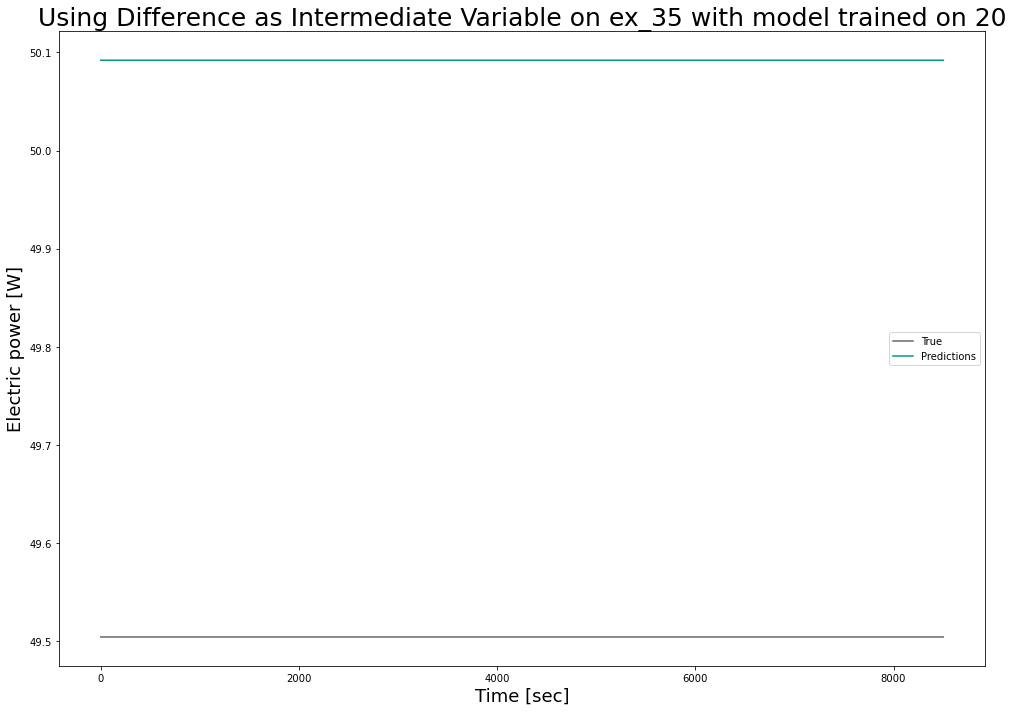

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


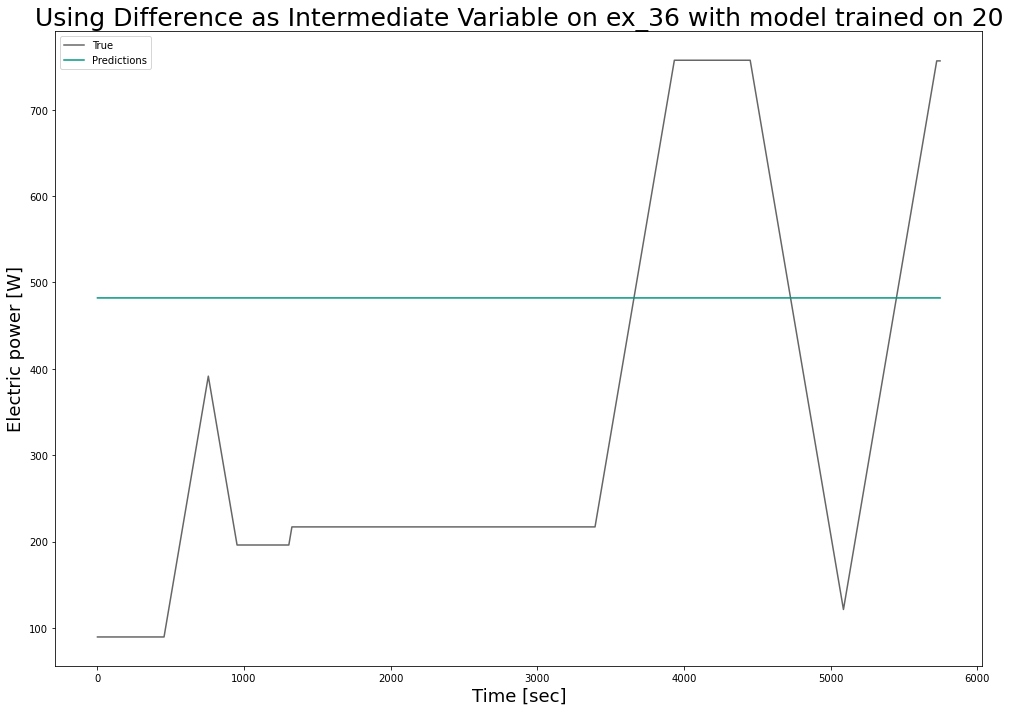

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


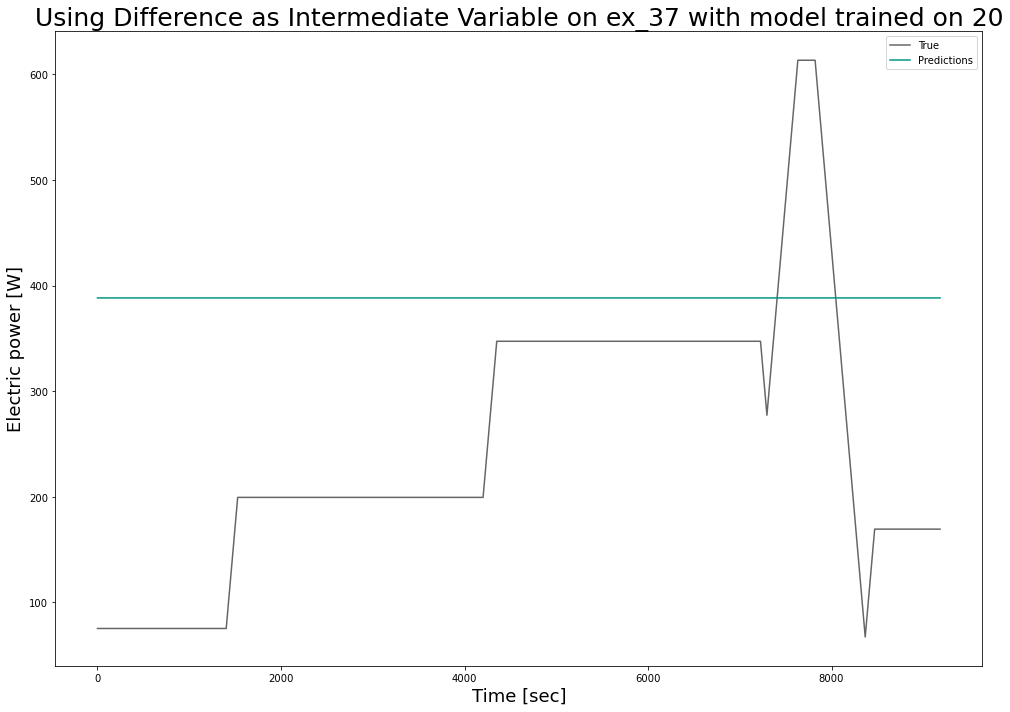

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


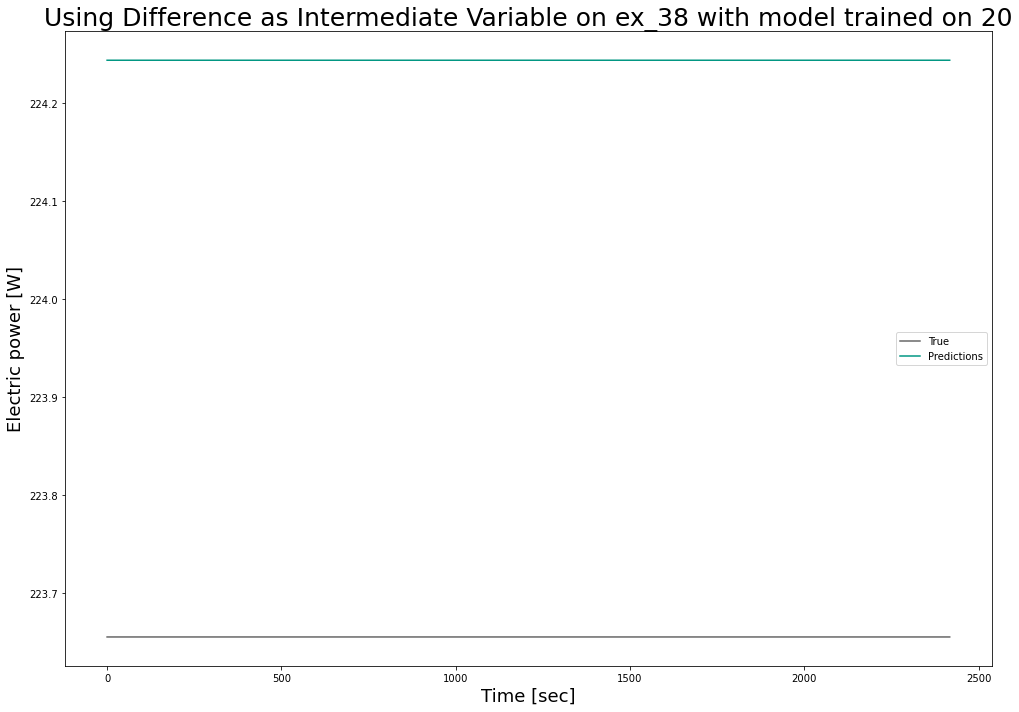

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


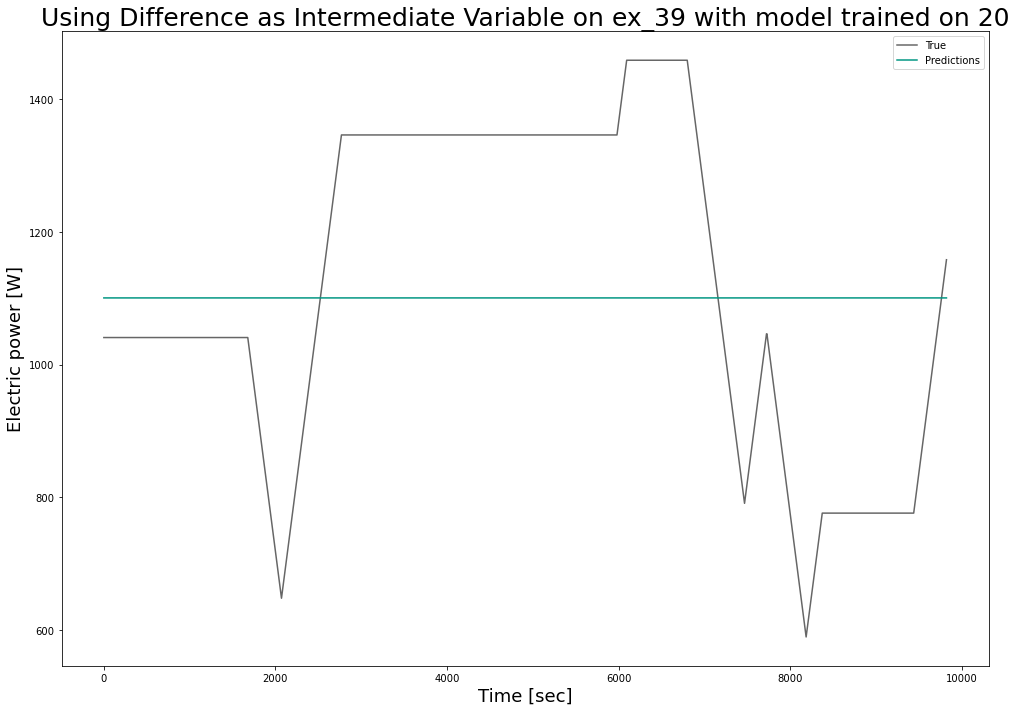

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


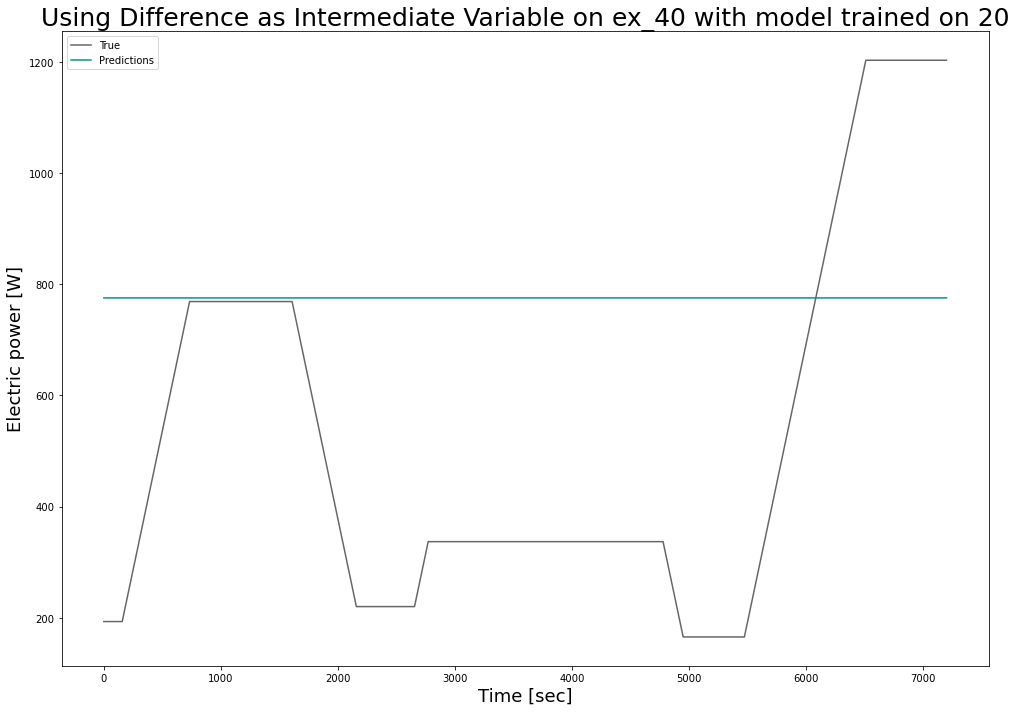

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


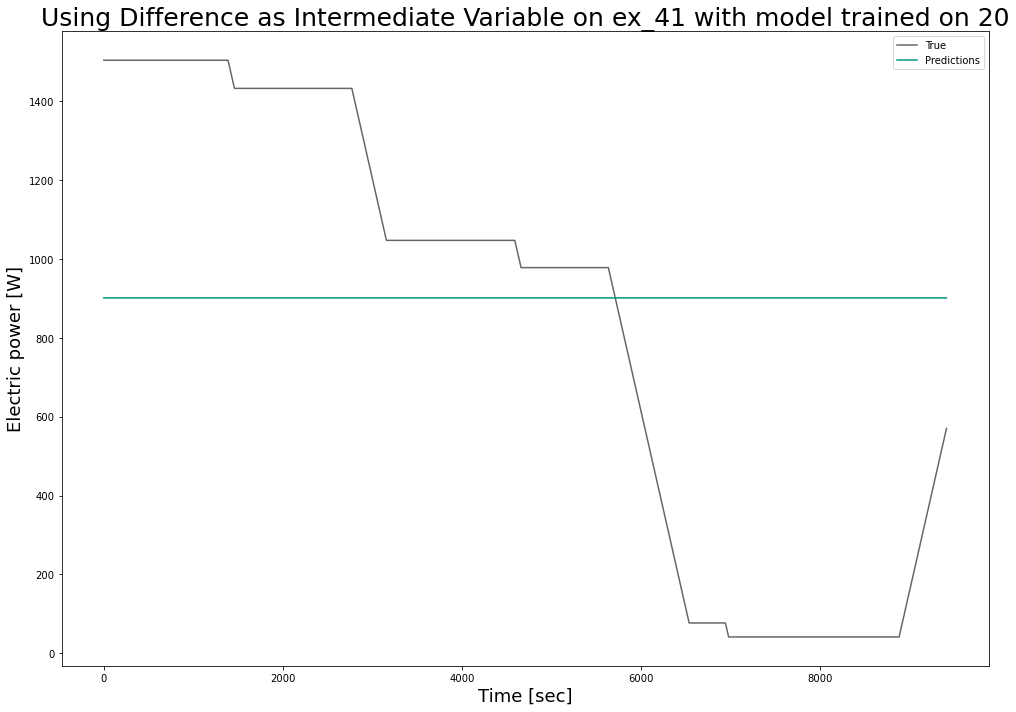

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


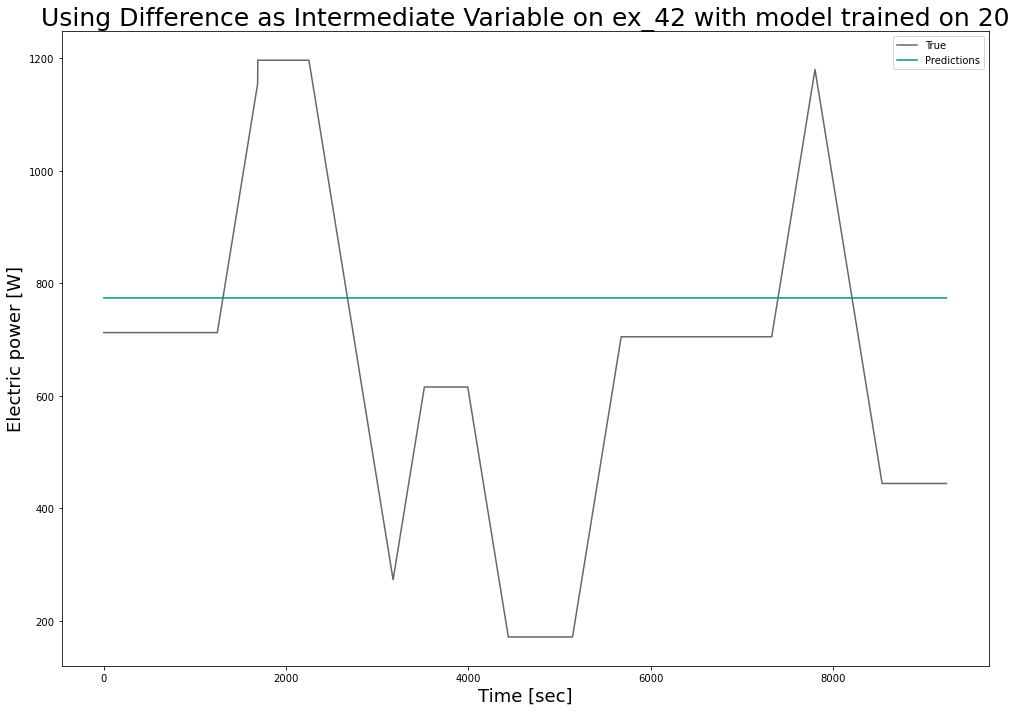

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


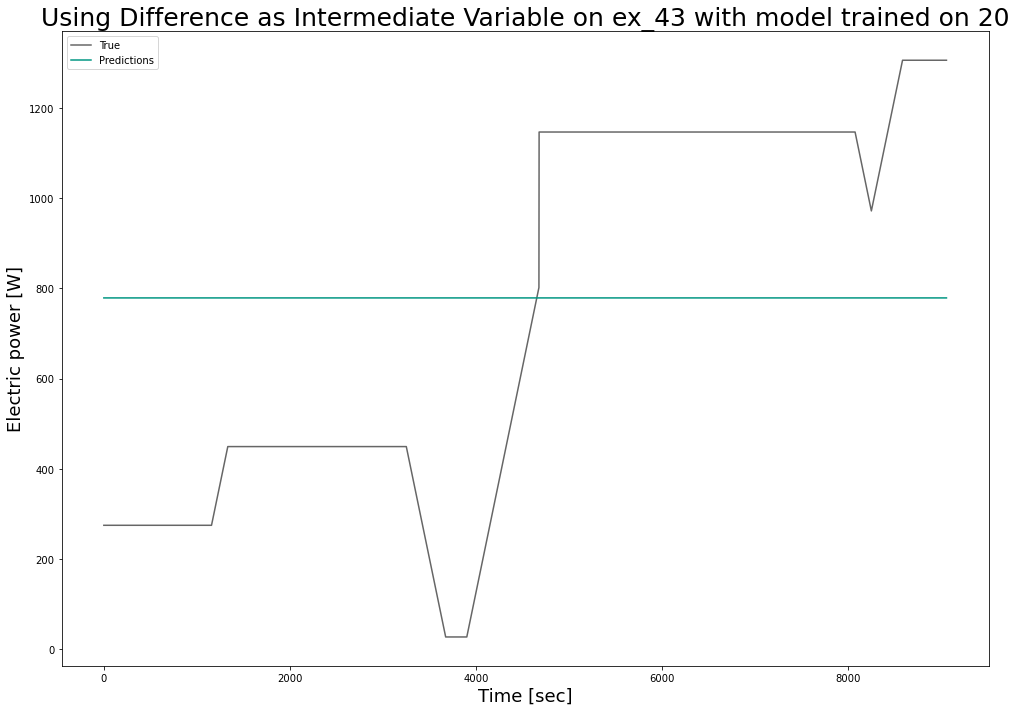

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


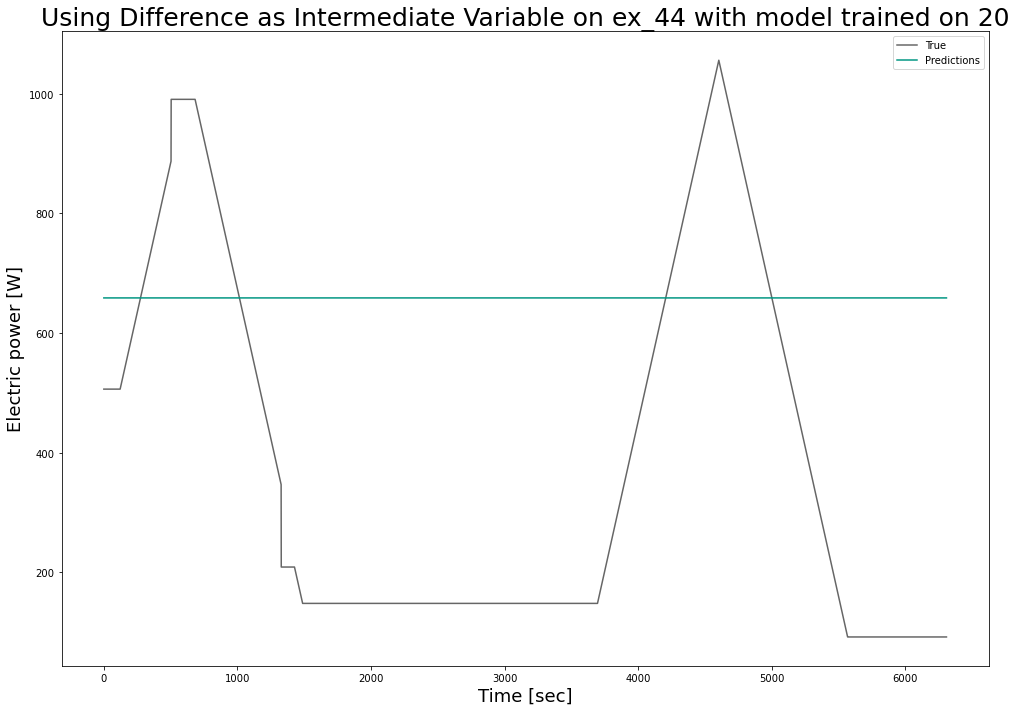

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


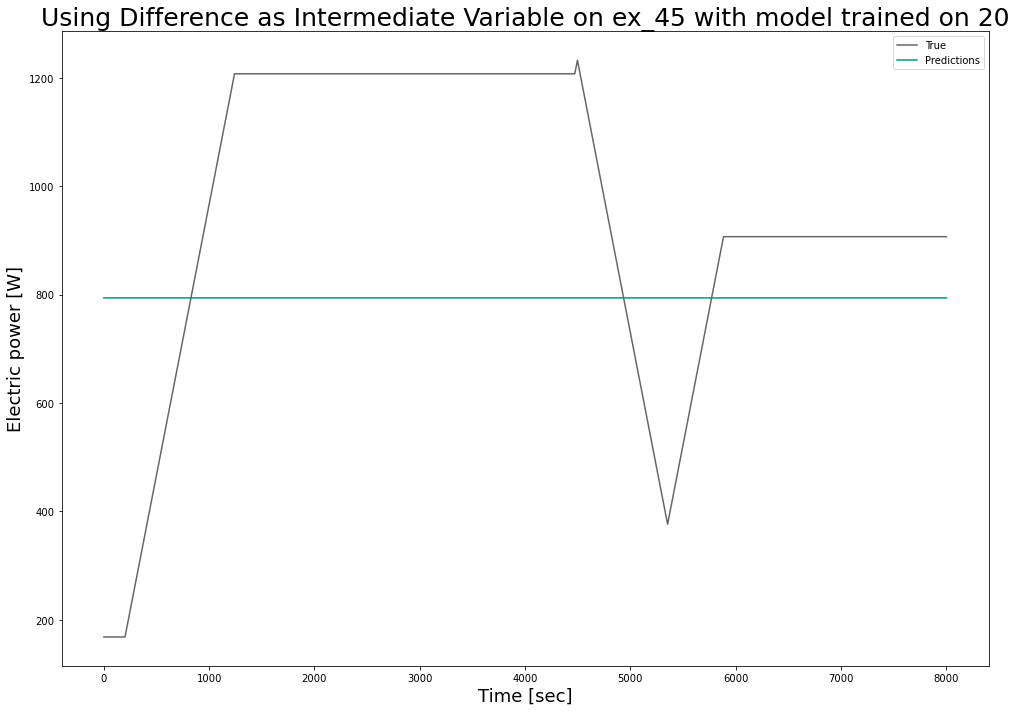

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


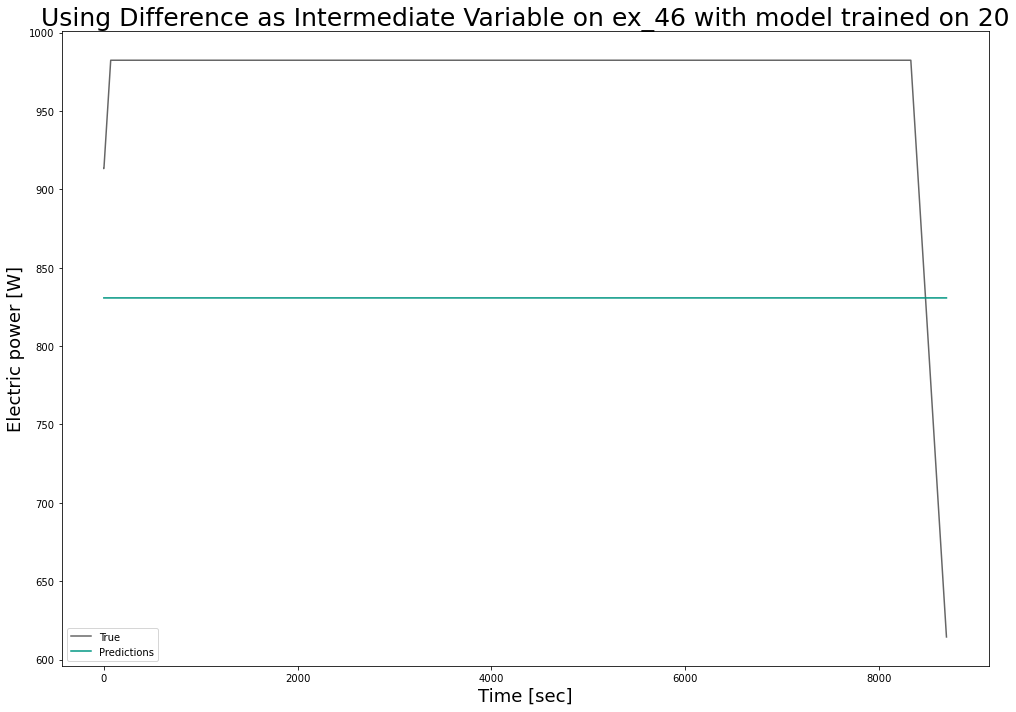

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


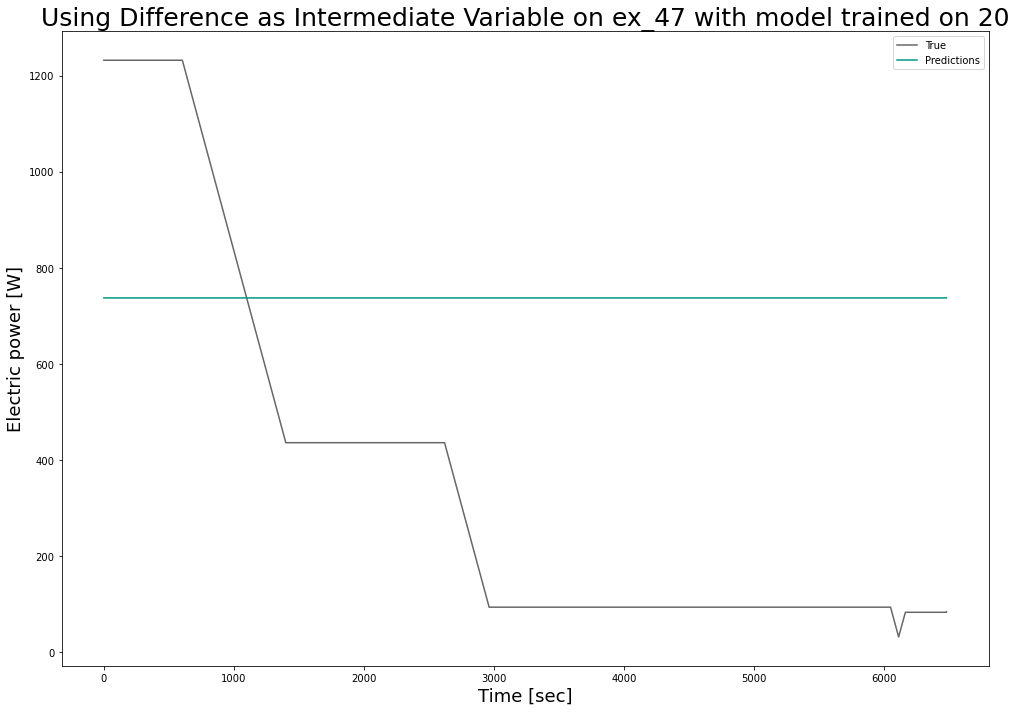

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


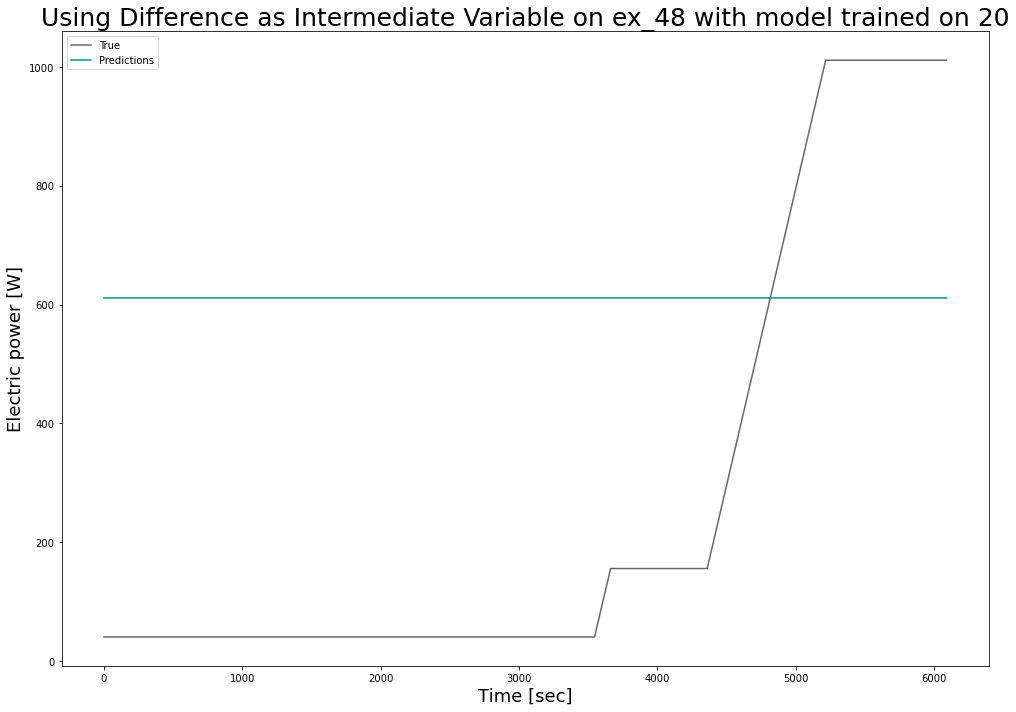

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


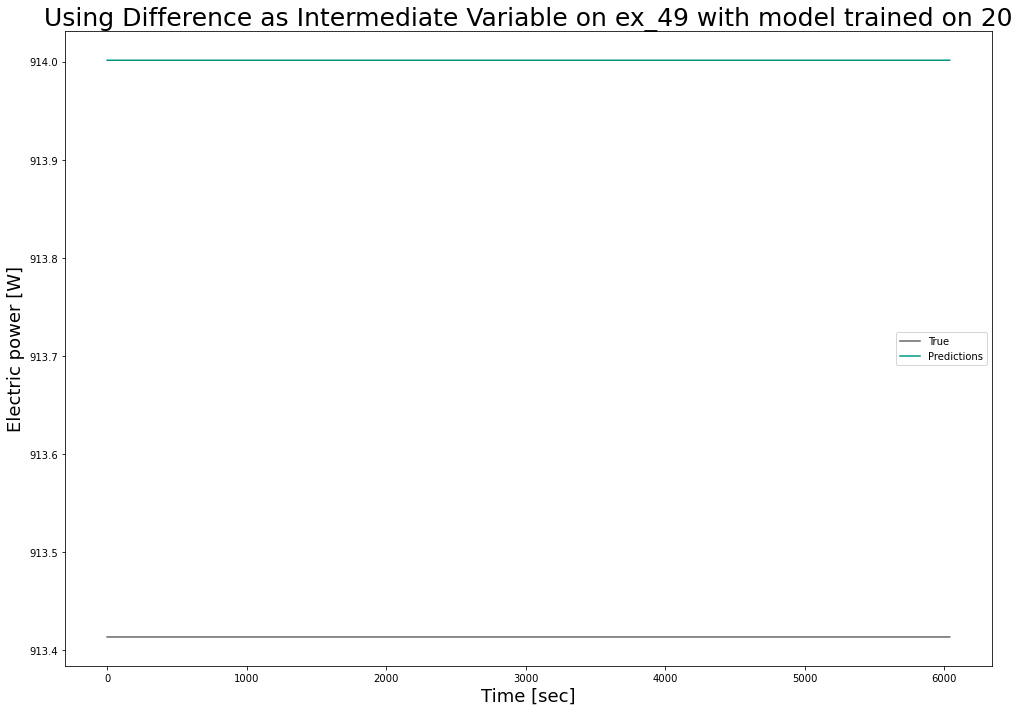

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['difference'] = diffs


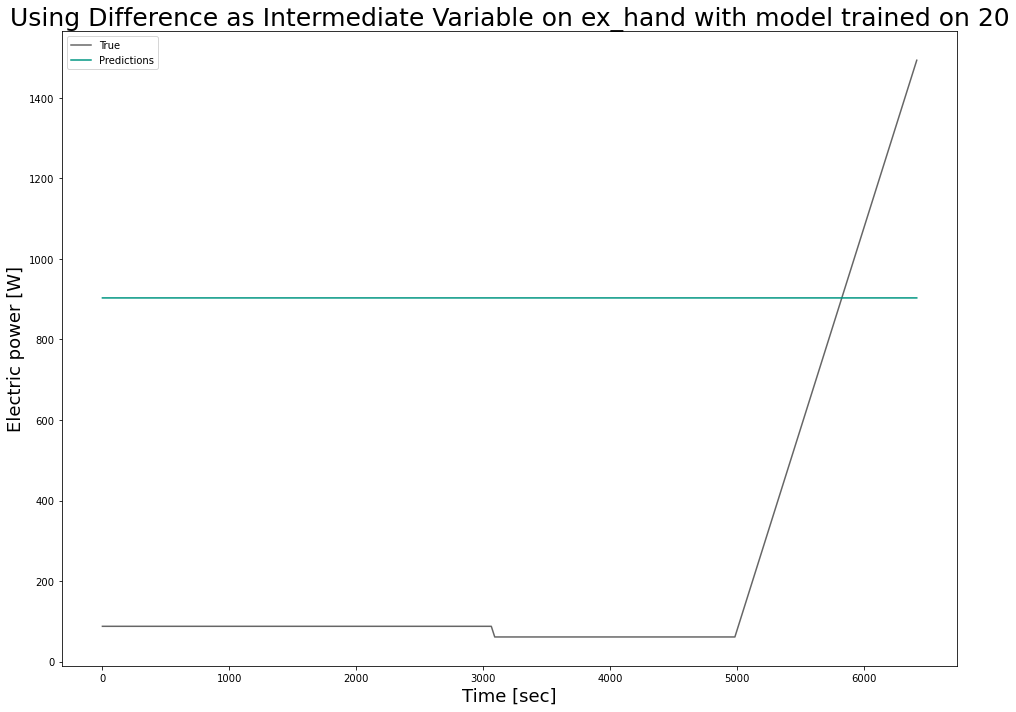

In [13]:
all_scaler = list()
all_X_values = list()
all_y_values = list()
all_predictions = list()
all_scaled_predictions = list()

for i in range(len(experiments)):
    scaler, X, y, preds_scaled, preds = nn.predictions(experiments[i], model,
                                                       difference_chosen = DIFFERENCE,
                                                      lag_chosen = LAG)
    all_scaler.append(scaler)
    all_X_values.append(X)
    all_y_values.append(y)
    all_predictions.append(preds)
    all_scaled_predictions.append(preds_scaled)
    
    gf.create_prediction_plot(experiments[i]['el_power'], preds, image_folder,
                              title = 'Using Difference as Intermediate Variable ',
                             specs = 'on ex_{0} with model trained on {1}'.format(names[i], train))
    results = gf.measure_difference(experiments[i]['el_power'], preds, should_print = False)
    results.to_csv(image_folder + "results_ex_{0}.csv".format(names[i]), sep = "|", encoding = 'utf-8')
    results_scaled = gf.measure_difference(y, preds_scaled, should_print = False)
    results_scaled.to_csv(image_folder + "results_scaled_ex_{0}.csv".format(names[i]), sep = "|", encoding = 'utf-8')